# <span style="color:red">Preproccesing</span>

In [1]:
!pip install pandas numpy scikit-learn wordcloud eli5 lightgbm

In [2]:
!pip install xgboost


In [232]:
import numpy as np
import pandas as pd
import sklearn
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn import model_selection # for splitting into train and test
import json
import ast
from urllib.request import urlopen
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from lightgbm import early_stopping
import lightgbm as lgb
from matplotlib import pyplot
from itertools import combinations
import sklearn
import eli5
print("Scikit-learn version:", sklearn.__version__)
print("Eli5 imported successfully!")
print('Libraries imported..')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/avabender/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Scikit-learn version: 1.1.3
Eli5 imported successfully!
Libraries imported..


In [233]:
#loading the data set
df = pd.read_csv("TMDB_all_movies.csv")
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes,poster_path
0,2,Ariel,7.1,335.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,fi,Ariel,After the coal mine he works at closes and his...,11.915,NaN,"Comedy, Drama, Romance, Crime",Villealfa Filmproductions,Finland,suomi,"Heikki Salomaa, Hanna Jokinen, Matti Pellonpää...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Aki Kaurismäki,NaN,7.4,8770.0,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg
1,3,Shadows in Paradise,7.3,369.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,fi,Varjoja paratiisissa,"Nikander, a rubbish collector and would-be ent...",16.287,NaN,"Comedy, Drama, Romance",Villealfa Filmproductions,Finland,"suomi, English, svenska","Kati Outinen, Ulla Kuosmanen, Jaakko Talaskivi...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Mika Kaurismäki,NaN,7.5,7526.0,/nj01hspawPof0mJmlgfjuLyJuRN.jpg
2,5,Four Rooms,5.8,2623.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,18.079,Twelve outrageous guests. Four scandalous requ...,Comedy,"Miramax, A Band Apart",United States of America,English,"Quentin Tarantino, Jennifer Beals, Antonio Ban...","Alexandre Rockwell, Quentin Tarantino, Allison...","Rodrigo García, Guillermo Navarro, Phil Parmet...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Quentin Tarantino, Lawrenc...",Combustible Edison,6.7,112605.0,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg
3,6,Judgment Night,6.5,331.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,en,Judgment Night,"Four young friends, while taking a shortcut en...",8.924,Don't move. Don't whisper. Don't even breathe.,"Action, Crime, Thriller","Largo Entertainment, JVC, Universal Pictures",United States of America,English,"Cuba Gooding Jr., Peter Greene, David L. Crowl...",Stephen Hopkins,Peter Levy,"Jere Cunningham, Lewis Colick","Gene Levy, Lloyd Segan, Marilyn Vance",Alan Silvestri,6.6,19303.0,/3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg
4,8,Life in Loops (A Megacities RMX),7.5,27.0,Released,2006-01-01,0.0,80.0,42000.0,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,3.203,A Megacities remix.,Documentary,inLoops,Austria,"English, हिन्दी, 日本語, Pусский, Español",NaN,Timo Novotny,Wolfgang Thaler,"Michael Glawogger, Timo Novotny","Ulrich Gehmacher, Timo Novotny",NaN,8.2,284.0,/7ln81BRnPR2wqxuITZxEciCe1lc.jpg


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017605 entries, 0 to 1017604
Data columns (total 28 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1017605 non-null  int64  
 1   title                    1017594 non-null  object 
 2   vote_average             1017603 non-null  float64
 3   vote_count               1017603 non-null  float64
 4   status                   1017603 non-null  object 
 5   release_date             904724 non-null   object 
 6   revenue                  1017603 non-null  float64
 7   runtime                  1017603 non-null  float64
 8   budget                   1017603 non-null  float64
 9   imdb_id                  590676 non-null   object 
 10  original_language        1017603 non-null  object 
 11  original_title           1017594 non-null  object 
 12  overview                 838363 non-null   object 
 13  popularity               1017603 non-null 

In [235]:
df.shape

(1017605, 28)

In [236]:
df.isnull().sum()

id                              0
title                          11
vote_average                    2
vote_count                      2
status                          2
release_date               112881
revenue                         2
runtime                         2
budget                          2
imdb_id                    426929
original_language               2
original_title                 11
overview                   179242
popularity                      2
tagline                    866595
genres                     295346
production_companies       548024
production_countries       401952
spoken_languages           390708
cast                       338424
director                   183657
director_of_photography    773457
writers                    524784
producers                  693949
music_composer             918353
imdb_rating                588237
imdb_votes                 588237
poster_path                298519
dtype: int64

In [237]:
df = df.drop(columns=['music_composer', 'director_of_photography', 'poster_path'], errors='ignore')

In [238]:
df.isnull().sum()

id                           0
title                       11
vote_average                 2
vote_count                   2
status                       2
release_date            112881
revenue                      2
runtime                      2
budget                       2
imdb_id                 426929
original_language            2
original_title              11
overview                179242
popularity                   2
tagline                 866595
genres                  295346
production_companies    548024
production_countries    401952
spoken_languages        390708
cast                    338424
director                183657
writers                 524784
producers               693949
imdb_rating             588237
imdb_votes              588237
dtype: int64

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017605 entries, 0 to 1017604
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1017605 non-null  int64  
 1   title                 1017594 non-null  object 
 2   vote_average          1017603 non-null  float64
 3   vote_count            1017603 non-null  float64
 4   status                1017603 non-null  object 
 5   release_date          904724 non-null   object 
 6   revenue               1017603 non-null  float64
 7   runtime               1017603 non-null  float64
 8   budget                1017603 non-null  float64
 9   imdb_id               590676 non-null   object 
 10  original_language     1017603 non-null  object 
 11  original_title        1017594 non-null  object 
 12  overview              838363 non-null   object 
 13  popularity            1017603 non-null  float64
 14  tagline               151010 non-n

In [240]:
df.shape

(1017605, 25)

In [241]:
df.duplicated().sum()

0

In [242]:
df.isna().sum().sum()

6139003

In [243]:
df['release_date'].head()

0    1988-10-21
1    1986-10-17
2    1995-12-09
3    1993-10-15
4    2006-01-01
Name: release_date, dtype: object

In [244]:
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity,imdb_rating,imdb_votes
count,1.017605e+06,1.017603e+06,1.017603e+06,1.017603e+06,1.017603e+06,1.017603e+06,1.017603e+06,429368.000000,4.293680e+05
mean,7.204326e+05,2.124475e+00,2.333798e+01,7.896572e+05,4.545005e+01,3.093232e+05,1.924944e+00,6.252749,2.815916e+03
std,3.985218e+05,3.091112e+00,3.624708e+02,1.839652e+07,5.814924e+01,5.125521e+06,9.470385e+00,1.319927,3.163912e+04
min,2.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,5.000000e+00
25%,3.850430e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,6.000000e-01,5.500000,2.000000e+01
50%,7.161820e+05,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,0.000000e+00,8.400000e-01,6.400000,5.900000e+01
75%,1.075737e+06,5.000000e+00,1.000000e+00,0.000000e+00,8.600000e+01,0.000000e+00,1.470000e+00,7.100000,2.670000e+02
max,5.180730e+06,1.000000e+01,3.651500e+04,3.000000e+09,1.440000e+04,1.000000e+09,3.537856e+03,10.000000,2.962614e+06


In [245]:
df.corr(numeric_only=True)

,id,vote_average,vote_count,revenue,runtime,budget,popularity,imdb_rating,imdb_votes
id,1.000000,-0.426614,-0.086671,-0.052131,-0.262846,-0.071438,-0.076478,0.106277,-0.081104
vote_average,-0.426614,1.000000,0.097882,0.061730,0.254096,0.076253,0.131495,0.038801,0.087431
vote_count,-0.086671,0.097882,1.000000,0.726730,0.071626,0.606304,0.312478,0.041050,0.931143
revenue,-0.052131,0.061730,0.726730,1.000000,0.052084,0.685071,0.281995,0.025026,0.663826
runtime,-0.262846,0.254096,0.071626,0.052084,1.000000,0.068113,0.095310,-0.023229,0.066858
budget,-0.071438,0.076253,0.606304,0.685071,0.068113,1.000000,0.293049,0.007014,0.565824
popularity,-0.076478,0.131495,0.312478,0.281995,0.095310,0.293049,1.000000,-0.011404,0.275777
imdb_rating,0.106277,0.038801,0.041050,0.025026,-0.023229,0.007014,-0.011404,1.000000,0.050841
imdb_votes,-0.081104,0.087431,0.931143,0.663826,0.066858,0.565824,0.275777,0.050841,1.000000


In [246]:
print("Rows With Zero Values In The Budget Column:",df[(df['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",df[(df['revenue']==0)].shape[0])

Rows With Zero Values In The Budget Column: 957765
Rows With Zero Values In The Revenue Column: 994245


In [247]:
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]

In [248]:
# Remove a specific movie by title
df = df[df['title'] != '蜘蛛侠：英雄无归']

# Reset index
df = df.reset_index(drop=True)


In [249]:

# Remove a specific movie by title
df = df[df['title'] != 'TikTok Rizz Party']

# Reset index
df = df.reset_index(drop=True)

In [250]:
top_20_movies =  df.sort_values(by='revenue', ascending=False).head(20)[['title','revenue']]
top_20_movies

,title,revenue
4342,Avatar,2.923706e+09
8562,Avengers: Endgame,2.799439e+09
6801,Avatar: The Way of Water,2.320250e+09
345,Titanic,2.264162e+09
7485,Star Wars: The Force Awakens,2.068224e+09
8563,Avengers: Infinity War,2.052415e+09
11019,Spider-Man: No Way Home,1.921847e+09
12646,Inside Out 2,1.682636e+09
7447,Jurassic World,1.671537e+09
9474,The Lion King,1.663000e+09


In [251]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,cast,director,writers,producers,imdb_rating,imdb_votes
0,5,Four Rooms,5.800,2623.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,18.079,Twelve outrageous guests. Four scandalous requ...,Comedy,"Miramax, A Band Apart",United States of America,English,"Quentin Tarantino, Jennifer Beals, Antonio Ban...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Quentin Tarantino, Lawrenc...",6.7,112605.0
1,6,Judgment Night,6.500,331.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,en,Judgment Night,"Four young friends, while taking a shortcut en...",8.924,Don't move. Don't whisper. Don't even breathe.,"Action, Crime, Thriller","Largo Entertainment, JVC, Universal Pictures",United States of America,English,"Cuba Gooding Jr., Peter Greene, David L. Crowl...",Stephen Hopkins,"Jere Cunningham, Lewis Colick","Gene Levy, Lloyd Segan, Marilyn Vance",6.6,19303.0
2,11,Star Wars,8.204,20541.0,Released,1977-05-25,775398007.0,121.0,11000000.0,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,83.114,"A long time ago in a galaxy far, far away...","Adventure, Action, Science Fiction","Lucasfilm Ltd., 20th Century Fox",United States of America,English,"Lightning Bear, Geoffrey Moon, Alfie Curtis, G...",George Lucas,George Lucas,"George Lucas, Rick McCallum, Gary Kurtz",8.6,1478201.0
3,12,Finding Nemo,7.819,19180.0,Released,2003-05-30,940335536.0,100.0,94000000.0,tt0266543,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",102.869,There are 3.7 trillion fish in the ocean. They...,"Animation, Family",Pixar,United States of America,English,"Bob Bergen, Ellen DeGeneres, Joe Ranft, Elizab...",Andrew Stanton,"Jim Capobianco, Blake Tucker, Andrew Stanton, ...","Graham Walters, John Lasseter",8.2,1135995.0
4,13,Forrest Gump,8.471,27381.0,Released,1994-06-23,677387716.0,142.0,55000000.0,tt0109830,en,Forrest Gump,A man with a low IQ has accomplished great thi...,90.795,The world will never be the same once you've s...,"Comedy, Drama, Romance","Paramount Pictures, The Steve Tisch Company, W...",United States of America,English,"Juan Singleton, Christopher James Hall, Elvis ...",Robert Zemeckis,"Winston Groom, Eric Roth","Steve Tisch, Steve Starkey, Wendy Finerman",8.8,2318314.0


# <span style="color:red">Exploratory Data Analysis (EDA)</span>

<Axes: >

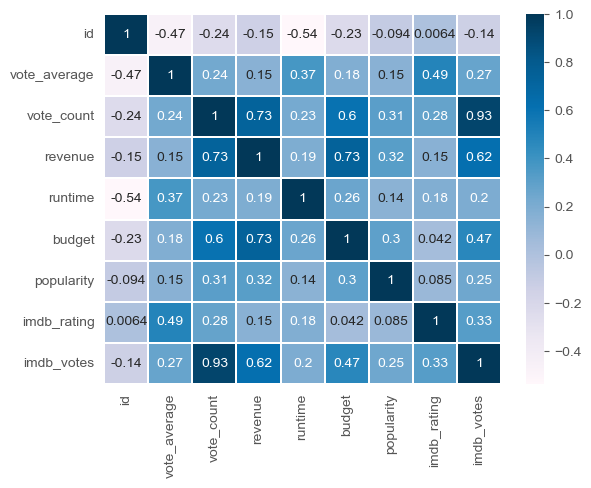

In [252]:
sns.heatmap(df.corr(numeric_only=True), cmap='PuBu', annot=True, linewidths=0.2)

<Axes: >

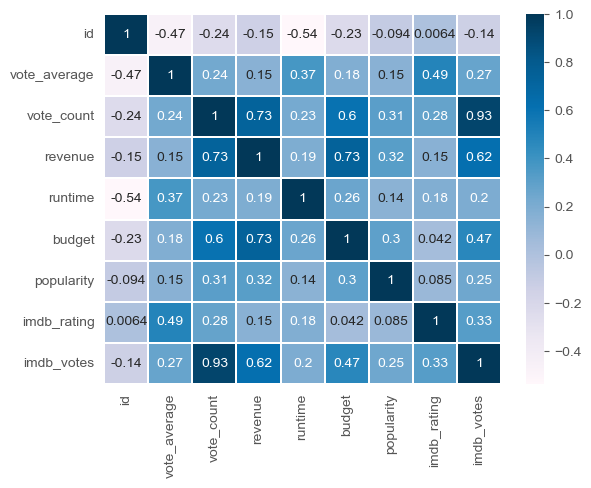

In [253]:
sns.heatmap(df.corr(numeric_only=True), cmap='PuBu', annot=True, linewidths=0.2)

The heatmap reveals key relationships between numeric variables in the dataset. Revenue, the target variable, shows a strong positive correlation with vote_count (0.73), budget (0.69), and imdb_votes (0.66), indicating that movies with higher budgets and more audience engagement tend to generate higher revenues. A moderate correlation exists between revenue and popularity (0.28), while vote_average and runtime show minimal impact on revenue. Additionally, a very high correlation is observed between vote_count and imdb_votes (0.93), suggesting these variables capture similar audience metrics. These insights highlight potential predictors of revenue and suggest areas to focus on for feature selection in modeling.

<Axes: xlabel='revenue', ylabel='Count'>

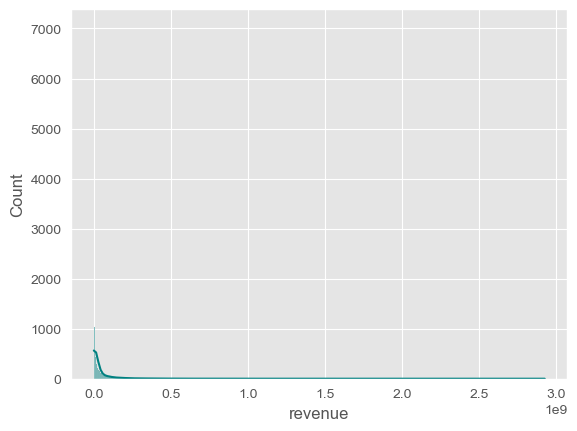

In [254]:
sns.histplot(df['revenue'], kde=True, color='teal')

Heavy skewness makes it difficult to draw any conclusions from this graph

### Using log

In [255]:
# Removing rows where revenue is 0
df = df[df['revenue'] > 0]

# Log-transform the revenue to reduce skewness
df['log_revenue'] = np.log1p(df['revenue'])

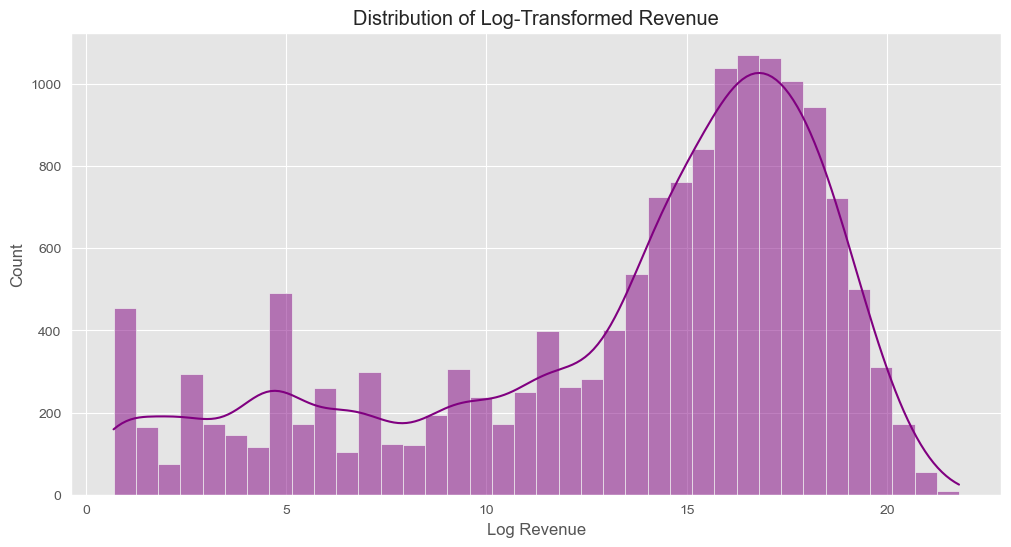

In [256]:
plt.figure(figsize=(12,6))
sns.histplot(df['log_revenue'], kde=True, color='purple')
plt.title('Distribution of Log-Transformed Revenue')
plt.xlabel('Log Revenue')
plt.ylabel('Count')
plt.show()

This plot shows the distribution of log-transformed movie revenues. Most movies fall within the middle range, with the highest concentration around a log-revenue of 15. The log transformation helps compress the wide range of revenue values, making the data easier to analyze. Fewer movies have very low or very high revenues, as seen by the shorter bars at the edges.

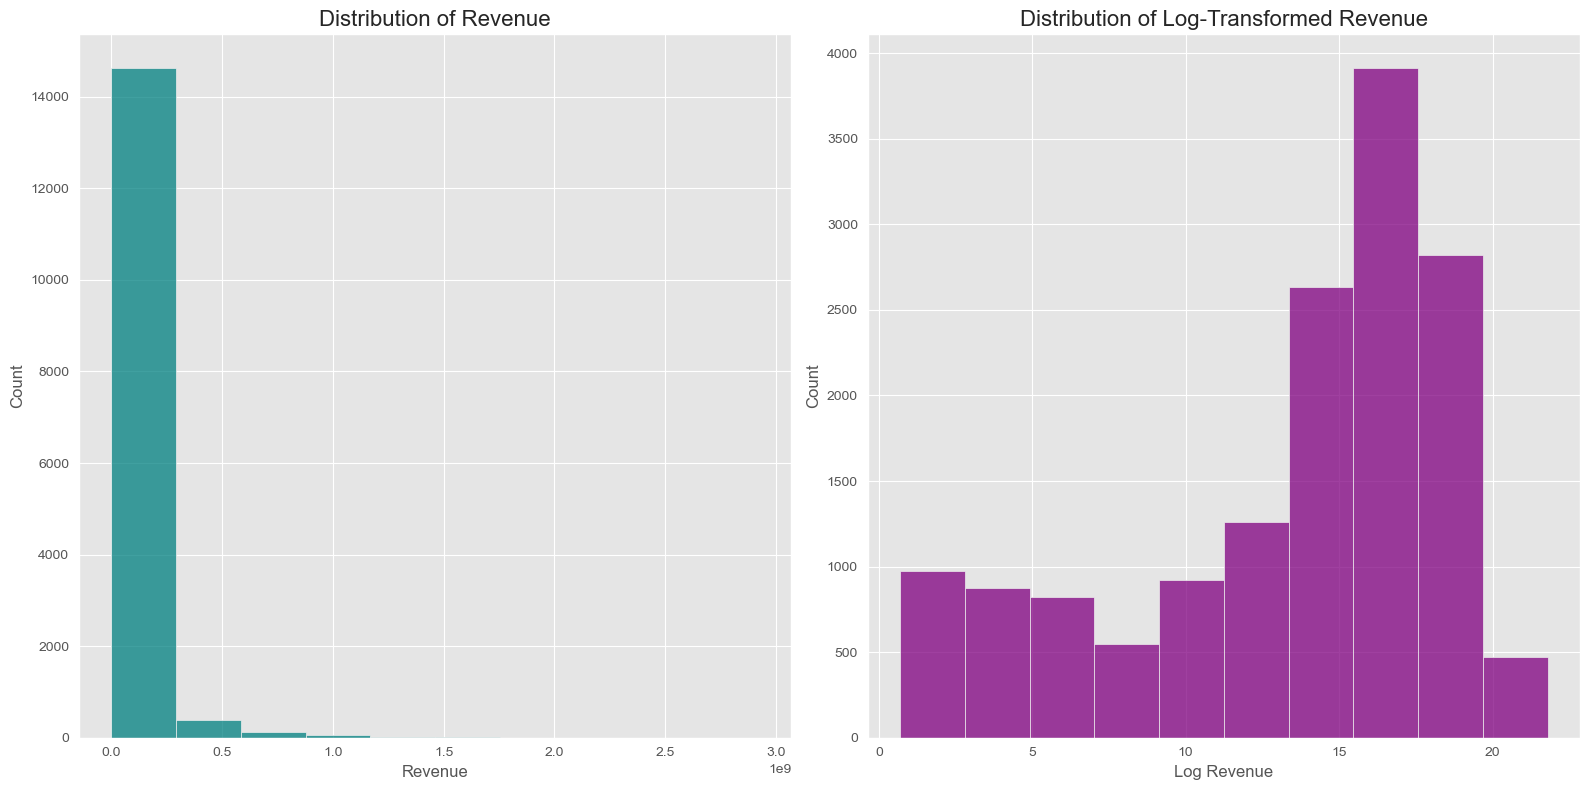

In [257]:
#comparing distribution of reveune and log reveune with histograms

plt.figure(figsize=(16, 8))

# Original revenue
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.histplot(df['revenue'], bins=10, kde=False, color='teal')
plt.title('Distribution of Revenue', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Count', fontsize=12)

# log-transformed revenue
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.histplot(df['log_revenue'], bins=10, kde=False, color='purple')
plt.title('Distribution of Log-Transformed Revenue', fontsize=16)
plt.xlabel('Log Revenue', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

**fig 1 (left)** is highly skewed, with most movies generating low revenue and a few outliers earning significantly more. 

**fig 2 (right)** is more balanced, making it suitable for analysis and modeling by reducing the impact of extreme values.

<Axes: xlabel='budget', ylabel='Count'>

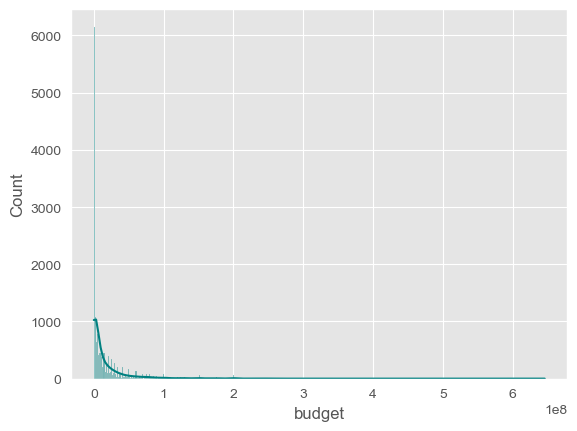

In [258]:
sns.histplot(df['budget'], kde=True, color='teal')

In [259]:
# Removing rows where revenue is 0
df = df[df['budget'] > 0]

# Log-transform the revenue to reduce skewness
df['log_budget'] = np.log1p(df['budget'])

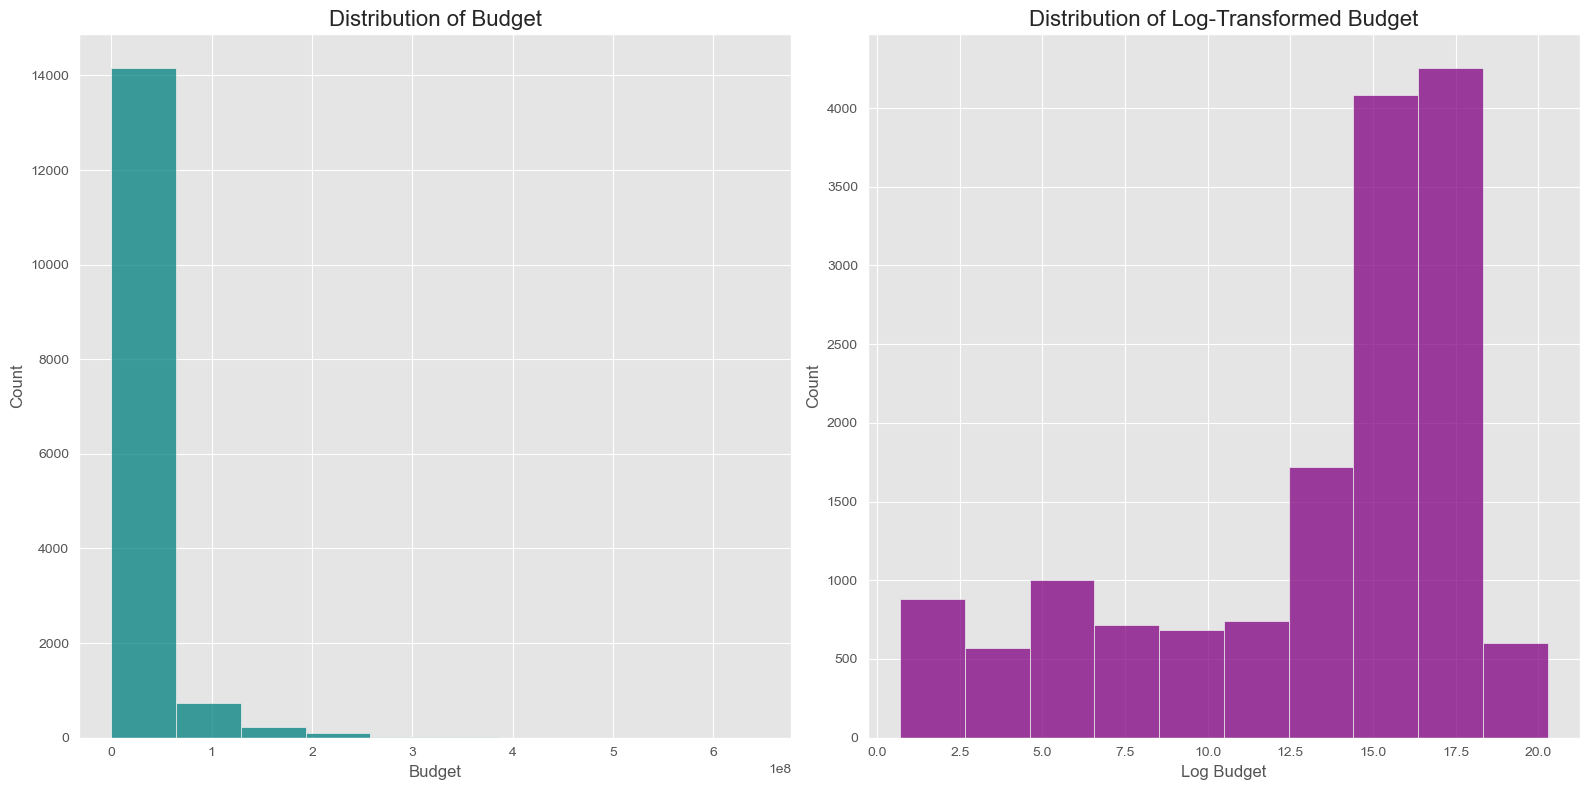

In [260]:
#comparing distribution of budget and log budget side by side with histograms

plt.figure(figsize=(16, 8))

# Original budget
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.histplot(df['budget'], bins=10, kde=False, color='teal')
plt.title('Distribution of Budget', fontsize=16)
plt.xlabel('Budget', fontsize=12)
plt.ylabel('Count', fontsize=12)

# log-transformed budget
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.histplot(df['log_budget'], bins=10, kde=False, color='purple')
plt.title('Distribution of Log-Transformed Budget', fontsize=16)
plt.xlabel('Log Budget', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

**fig 1 (left)**, the raw budget distribution is heavily skewed, with most movies having relatively small budgets and a few outliers with exceptionally high budgets. 

**fig 2 (right)**, the log-transformed budget normalizes the data, spreading it more evenly. This transformation reduces the influence of extreme values, making the budget data more suitable for analysis and modeling.

## Relationship between Revenue and Budget

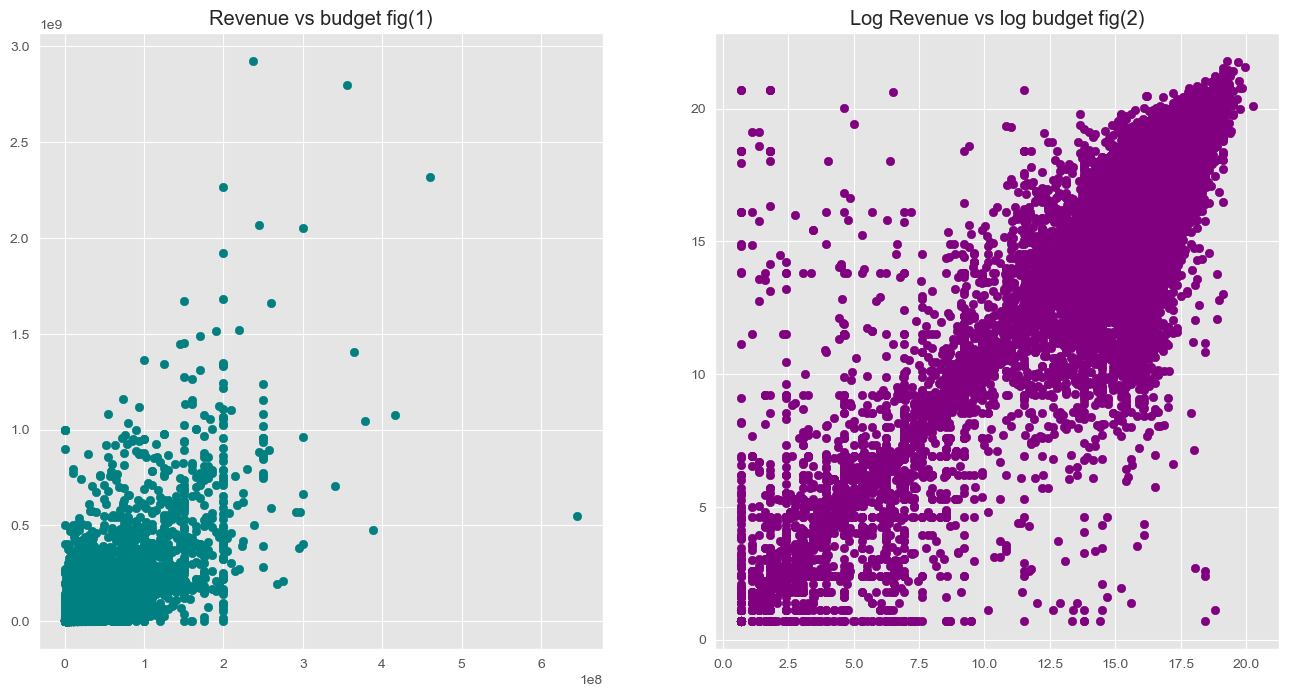

In [261]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(df['budget'], df['revenue'], color='teal')
plt.title('Revenue vs budget fig(1)');
plt.subplot(1, 2, 2)
plt.scatter(df['log_budget'], df['log_revenue'], color='purple')
plt.title('Log Revenue vs log budget fig(2)');

In **fig 1 (left)**, the raw budget and revenue show a positive trend, with higher-budget movies generally earning more revenue. However, the data is highly dispersed, with many low-budget films earning relatively low revenue and a few high-budget movies achieving exceptional earnings.

In **fig 2 (right)**, the log-transformed budget and revenue display a clearer linear relationship. The transformation reduces skewness and highlights the stronger correlation between these variables, making it easier to analyze and model their interaction.

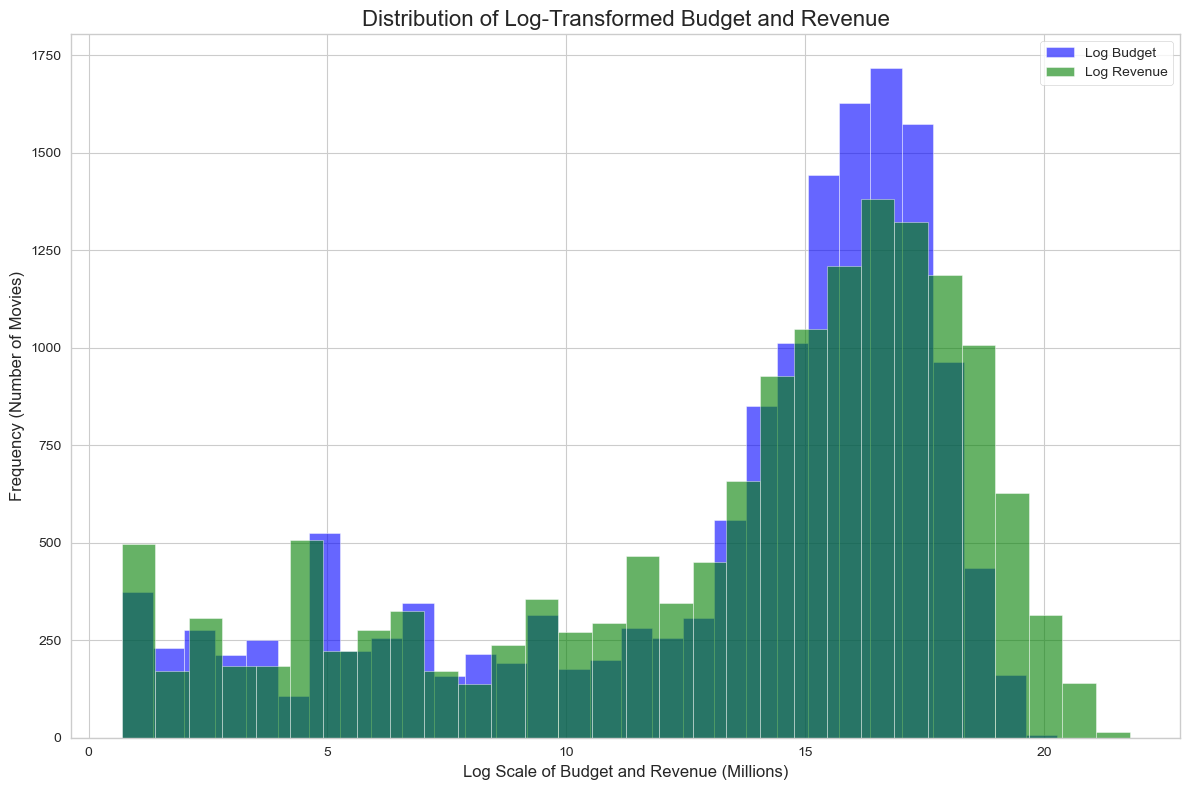

In [262]:
df['log_budget'] = np.log1p(df['budget'])
df['log_revenue'] = np.log1p(df['revenue'])

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

plt.hist(df['log_budget'].dropna(), bins=30, alpha=0.6, label='Log Budget', color='blue')
plt.hist(df['log_revenue'].dropna(), bins=30, alpha=0.6, label='Log Revenue', color='green')
plt.title('Distribution of Log-Transformed Budget and Revenue', fontsize=16)
plt.xlabel('Log Scale of Budget and Revenue (Millions)', fontsize=12)
plt.ylabel('Frequency (Number of Movies)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

This histogram compares the log-transformed **budget** (blue) and **revenue** (green) distributions for movies, showing how these values are spread across the dataset. The x-axis represents the natural log of budget and revenue, compressing large values for easier comparison, while the y-axis shows the number of movies (frequency) in each range. Most movies have log-transformed values around 15-16, corresponding to budgets and revenues in the hundreds of millions of dollars. Generally, revenues exceed budgets, as seen by the higher green bars, but some outliers exist. The log scale highlights trends across a wide range of values, showing that higher budgets often correlate with higher revenues.

## Langauge distribution vs mean reveune

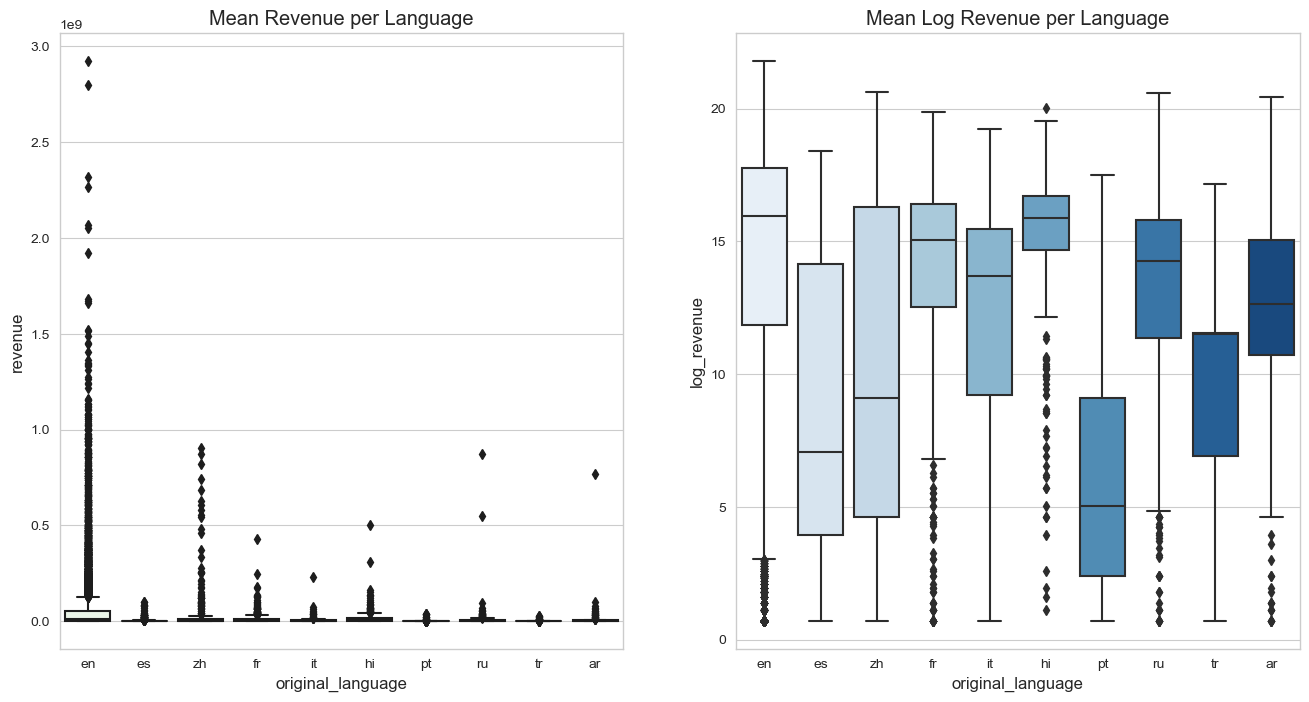

In [263]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='original_language', y='revenue', palette='Greens', data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)]);
plt.title('Mean Revenue per Language');
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y='log_revenue', palette='Blues', data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)]);
plt.title('Mean Log Revenue per Language');

**fig 1 (left)**, shows English (en) language films have significantly higher revenue compared to other languages, overshadowing them in terms of earnings. However, this dominance could lead to potentially misleading conclusions about the performance of films in other languages. 

**fig 2 (right)**, using log-transformed revenue, normalizes the scale and reveals that movies in languages like Spanish (es), Chinese (zh), and French (fr) also show significant revenue ranges. However, English movies consistently dominate both in spread and median revenue.

## Actors by Total Revenue

In [264]:
print(df['cast'].head())

0    Quentin Tarantino, Jennifer Beals, Antonio Ban...
1    Cuba Gooding Jr., Peter Greene, David L. Crowl...
2    Lightning Bear, Geoffrey Moon, Alfie Curtis, G...
3    Bob Bergen, Ellen DeGeneres, Joe Ranft, Elizab...
4    Juan Singleton, Christopher James Hall, Elvis ...
Name: cast, dtype: object


In [265]:
df_clean = df[['cast', 'revenue']].dropna()
df_clean['cast'] = df_clean['cast'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
df_exploded = df_clean.explode('cast')
num_actors_to_display = 20
actor_revenue = df_exploded.groupby('cast')['revenue'].sum().sort_values(ascending=False).head(num_actors_to_display)
actor_revenue_df = actor_revenue.reset_index()
actor_revenue_df.columns = ['Actor', 'Total Revenue']

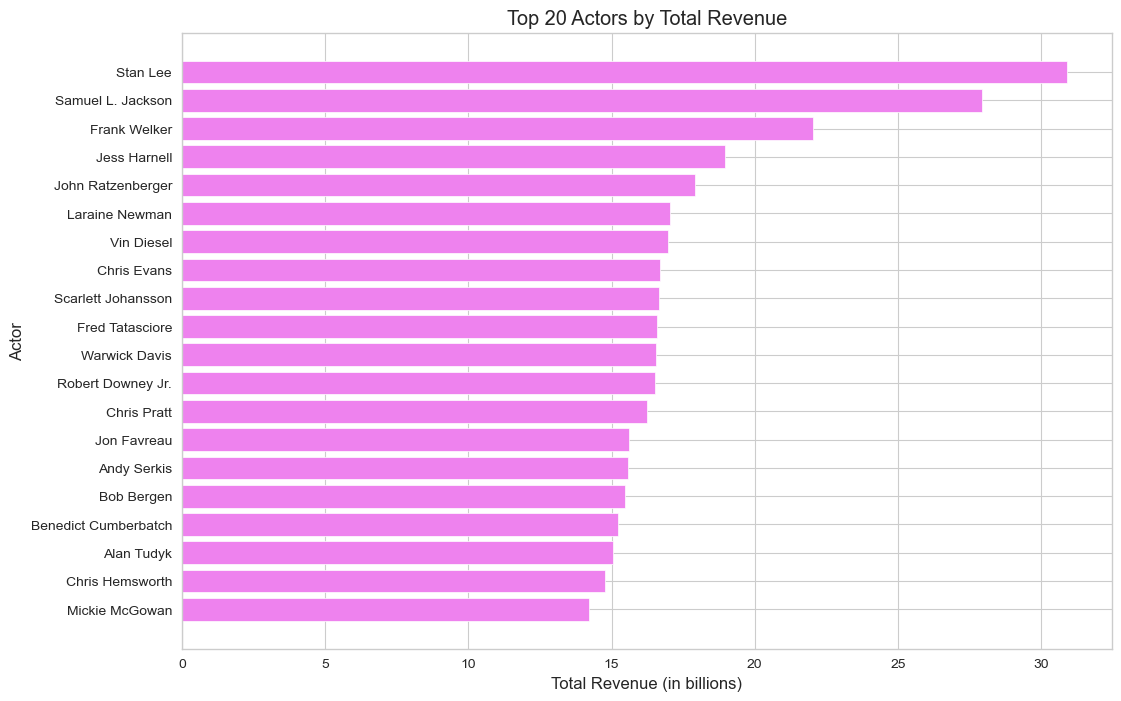

In [266]:
plt.figure(figsize=(12, 8))
plt.barh(actor_revenue_df['Actor'], actor_revenue_df['Total Revenue'] / 1e9, color='violet')
plt.xlabel('Total Revenue (in billions)')
plt.ylabel('Actor')
plt.title(f'Top {num_actors_to_display} Actors by Total Revenue')
plt.gca().invert_yaxis()
plt.show()

This bar chart shows the top 20 actors ranked by the total revenue generated by their films. Notably, Stan Lee and Samuel L. Jackson stand out with significantly higher revenues, reflecting their association with blockbuster franchises like Marvel.

## Directors by Total Revenue

In [267]:
num_directors_to_display = 20
director_revenue = df.groupby('director')['revenue'].sum().sort_values(ascending=False).head(num_directors_to_display)
director_revenue_df = director_revenue.reset_index()
director_revenue_df.columns = ['Director', 'Total Revenue']

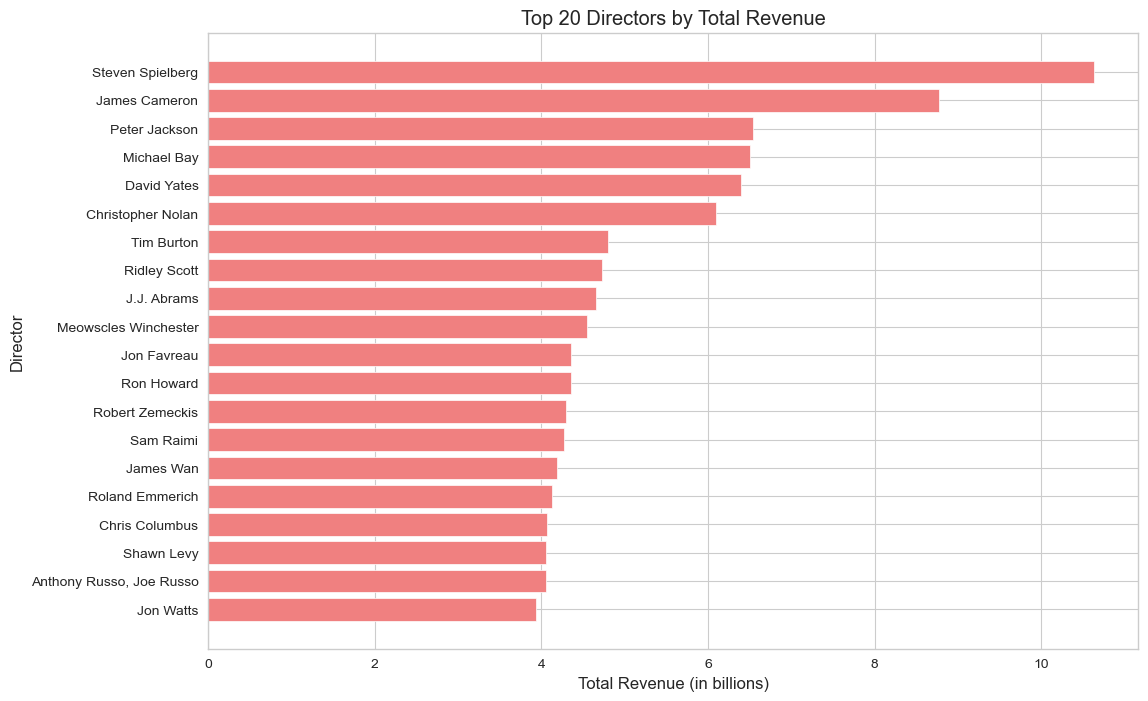

In [268]:
plt.figure(figsize=(12, 8))
plt.barh(director_revenue_df['Director'], director_revenue_df['Total Revenue'] / 1e9, color='lightcoral')
plt.xlabel('Total Revenue (in billions)')
plt.ylabel('Director')
plt.title(f'Top {num_directors_to_display} Directors by Total Revenue')
plt.gca().invert_yaxis()
plt.show()

This chart highlights the top 20 directors based on total revenue. Steven Spielberg has the highest total, followed by James Cameron and Peter Jackson. The consistent presence of directors known for large-scale productions indicates their strong impact on overall film revenues.

# Production Companies and Revenue

            Production Company  Total Revenue
44       Warner Bros. Pictures   8.188935e+10
4           Universal Pictures   7.640748e+10
64           Columbia Pictures   6.196882e+10
6             20th Century Fox   6.124677e+10
8           Paramount Pictures   5.837708e+10
34        Walt Disney Pictures   5.557027e+10
560             Marvel Studios   3.288161e+10
53             New Line Cinema   2.761007e+10
57         Metro-Goldwyn-Mayer   2.406530e+10
90        Amblin Entertainment   2.015972e+10
147  Village Roadshow Pictures   1.851362e+10
532       DreamWorks Animation   1.777281e+10
11         DreamWorks Pictures   1.753649e+10
7                        Pixar   1.739674e+10
931           Relativity Media   1.586262e+10


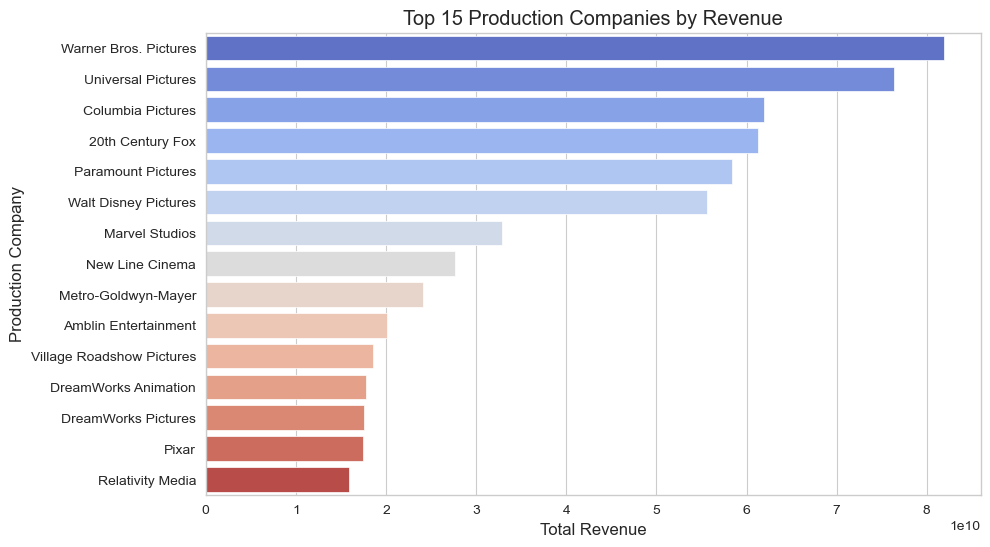

In [269]:
df['production_companies_list'] = df['production_companies'].fillna('').apply(lambda x: [c.strip() for c in x.split(',')])

company_revenue = Counter()
for index, row in df.iterrows():
    for company in row['production_companies_list']:
        company_revenue[company] += row['revenue']

company_revenue_df = pd.DataFrame(company_revenue.items(), columns=['Production Company', 'Total Revenue']).sort_values(by='Total Revenue', ascending=False)
print(company_revenue_df.head(15))

plt.figure(figsize=(10, 6))
sns.barplot(data=company_revenue_df.head(15), x='Total Revenue', y='Production Company', palette='coolwarm')
plt.title('Top 15 Production Companies by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Production Company')
plt.show()

Warner Bros Pictures has the highest total revenue followed by Universal Pictures and Columbia Pictures.

## Top Genres by Revenue

In [270]:
df['genre_pairs'] = df['genres'].fillna('').apply(lambda x: list(combinations(x.split(','), 2)) if ',' in x else [])
interaction_revenue = Counter()
for index, row in df.iterrows():
    for pair in row['genre_pairs']:
        interaction_revenue[pair] += row['revenue']

interaction_revenue_df = pd.DataFrame(interaction_revenue.items(), columns=['Genre Pair', 'Total Revenue']).sort_values(by='Total Revenue', ascending=False)
print(interaction_revenue_df.head(10))


                         Genre Pair  Total Revenue
63             (Action,  Adventure)   9.349589e+10
62       (Action,  Science Fiction)   6.472361e+10
1               (Action,  Thriller)   5.842626e+10
6              (Animation,  Family)   5.419522e+10
3              (Adventure,  Action)   5.316724e+10
109  ( Adventure,  Science Fiction)   4.202396e+10
22             (Animation,  Comedy)   4.050001e+10
172           ( Adventure,  Comedy)   3.985373e+10
23               ( Comedy,  Family)   3.868318e+10
17            (Adventure,  Fantasy)   3.622907e+10


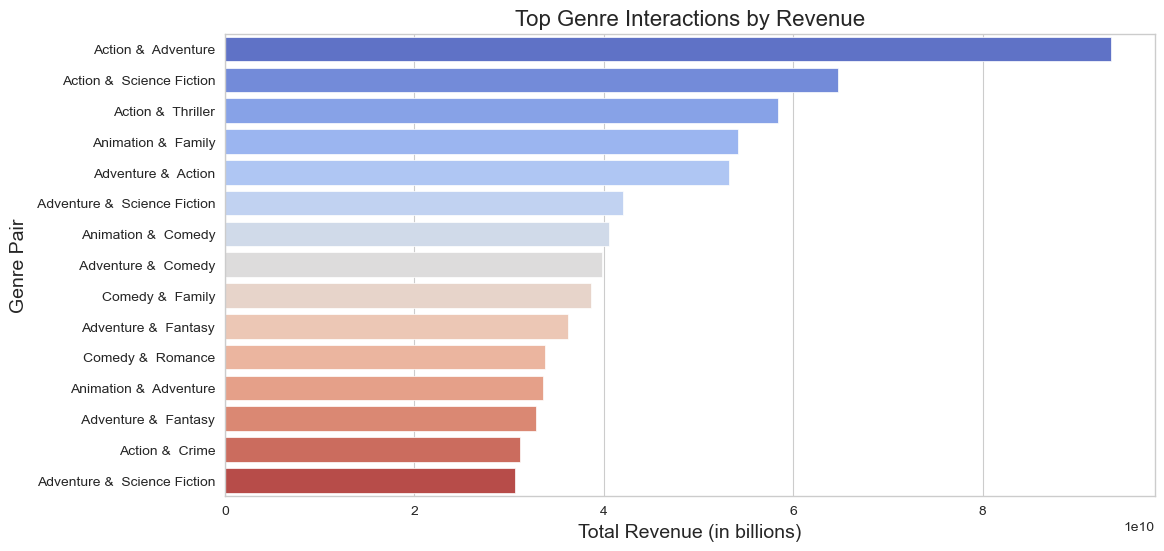

In [271]:
top_interactions = interaction_revenue_df.head(15)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Total Revenue',
    y=[f"{pair[0]} & {pair[1]}" for pair in top_interactions['Genre Pair']],
    data=top_interactions,
    palette='coolwarm'
)
plt.title('Top Genre Interactions by Revenue', fontsize=16)
plt.xlabel('Total Revenue (in billions)', fontsize=14)
plt.ylabel('Genre Pair', fontsize=14)
plt.show()


It appears that action and adventure is the top earning genre by a lot, followed by action and science fiction then action and thriller. The common genre in the top three is action.

## Genre Usage

In [272]:
df['genres'] = df['genres'].apply(
    lambda x: x.split(', ') if isinstance(x, str) else []
)
print(df['genres'].head())

0                                [Comedy]
1               [Action, Crime, Thriller]
2    [Adventure, Action, Science Fiction]
3                     [Animation, Family]
4                [Comedy, Drama, Romance]
Name: genres, dtype: object


In [273]:
unique_genres = df["genres"].apply(lambda x: pd.Series(x, dtype='object')).stack().dropna().unique()

print("Number of genres: {}".format(len(unique_genres)))
print("Genres: {}".format(unique_genres))

Number of genres: 19
Genres: ['Comedy' 'Action' 'Crime' 'Thriller' 'Adventure' 'Science Fiction'
 'Animation' 'Family' 'Drama' 'Romance' 'Mystery' 'Fantasy' 'War' 'Music'
 'Western' 'History' 'Horror' 'Documentary' 'TV Movie']


In [274]:
genres_features = pd.get_dummies(
    df["genres"].apply(lambda x: pd.Series(x, dtype='object')).stack()
).groupby(level=0).sum()
genres_features.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [275]:
train_genres = pd.concat([df, genres_features],axis=1, sort=False)
train_genres.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,cast,director,writers,producers,imdb_rating,imdb_votes,log_revenue,log_budget,production_companies_list,genre_pairs,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,5,Four Rooms,5.800,2623.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,18.079,Twelve outrageous guests. Four scandalous requ...,[Comedy],"Miramax, A Band Apart",United States of America,English,"Quentin Tarantino, Jennifer Beals, Antonio Ban...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Quentin Tarantino, Lawrenc...",6.7,112605.0,15.264159,15.201805,"[Miramax, A Band Apart]",[],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,Judgment Night,6.500,331.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,en,Judgment Night,"Four young friends, while taking a shortcut en...",8.924,Don't move. Don't whisper. Don't even breathe.,"[Action, Crime, Thriller]","Largo Entertainment, JVC, Universal Pictures",United States of America,English,"Cuba Gooding Jr., Peter Greene, David L. Crowl...",Stephen Hopkins,"Jere Cunningham, Lewis Colick","Gene Levy, Lloyd Segan, Marilyn Vance",6.6,19303.0,16.311764,16.860033,"[Largo Entertainment, JVC, Universal Pictures]","[(Action, Crime), (Action, Thriller), ( Crim...",1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,11,Star Wars,8.204,20541.0,Released,1977-05-25,775398007.0,121.0,11000000.0,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,83.114,"A long time ago in a galaxy far, far away...","[Adventure, Action, Science Fiction]","Lucasfilm Ltd., 20th Century Fox",United States of America,English,"Lightning Bear, Geoffrey Moon, Alfie Curtis, G...",George Lucas,George Lucas,"George Lucas, Rick McCallum, Gary Kurtz",8.6,1478201.0,20.468887,16.213406,"[Lucasfilm Ltd., 20th Century Fox]","[(Adventure, Action), (Adventure, Science Fi...",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,12,Finding Nemo,7.819,19180.0,Released,2003-05-30,940335536.0,100.0,94000000.0,tt0266543,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",102.869,There are 3.7 trillion fish in the ocean. They...,"[Animation, Family]",Pixar,United States of America,English,"Bob Bergen, Ellen DeGeneres, Joe Ranft, Elizab...",Andrew Stanton,"Jim Capobianco, Blake Tucker, Andrew Stanton, ...","Graham Walters, John Lasseter",8.2,1135995.0,20.661747,18.358805,[Pixar],"[(Animation, Family)]",0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13,Forrest Gump,8.471,27381.0,Released,1994-06-23,677387716.0,142.0,55000000.0,tt0109830,en,Forrest Gump,A man with a low IQ has accomplished great thi...,90.795,The world will never be the same once you've s...,"[Comedy, Drama, Romance]","Paramount Pictures, The Steve Tisch Company, W...",United States of America,English,"Juan Singleton, Christopher James Hall, Elvis ...",Robert Zemeckis,"Winston Groom, Eric Roth","Steve Tisch, Steve Starkey, Wendy Finerman",8.8,2318314.0,20.333754,17.822844,"[Paramount Pictures, The Steve Tisch Company, ...","[(Comedy, Drama), (Comedy, Romance), ( Drama...",0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


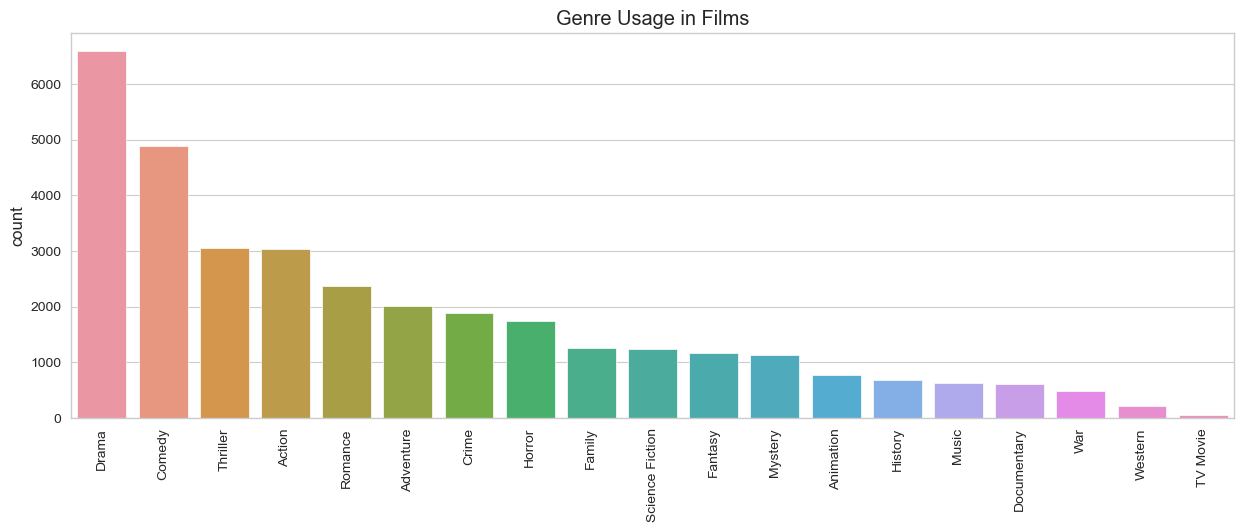

In [276]:
genres_overall = train_genres[unique_genres].sum().sort_values(ascending=False)
plt.figure(figsize=(15,5))
ax = sns.barplot(x=genres_overall.index, y=genres_overall.values)
plt.xticks(rotation=90)
plt.title("Genre Usage in Films")
plt.ylabel("count")
plt.show()

Drama appears to be the most popular genre used with Western being the least popular.

## Voter Ratings and Revenue

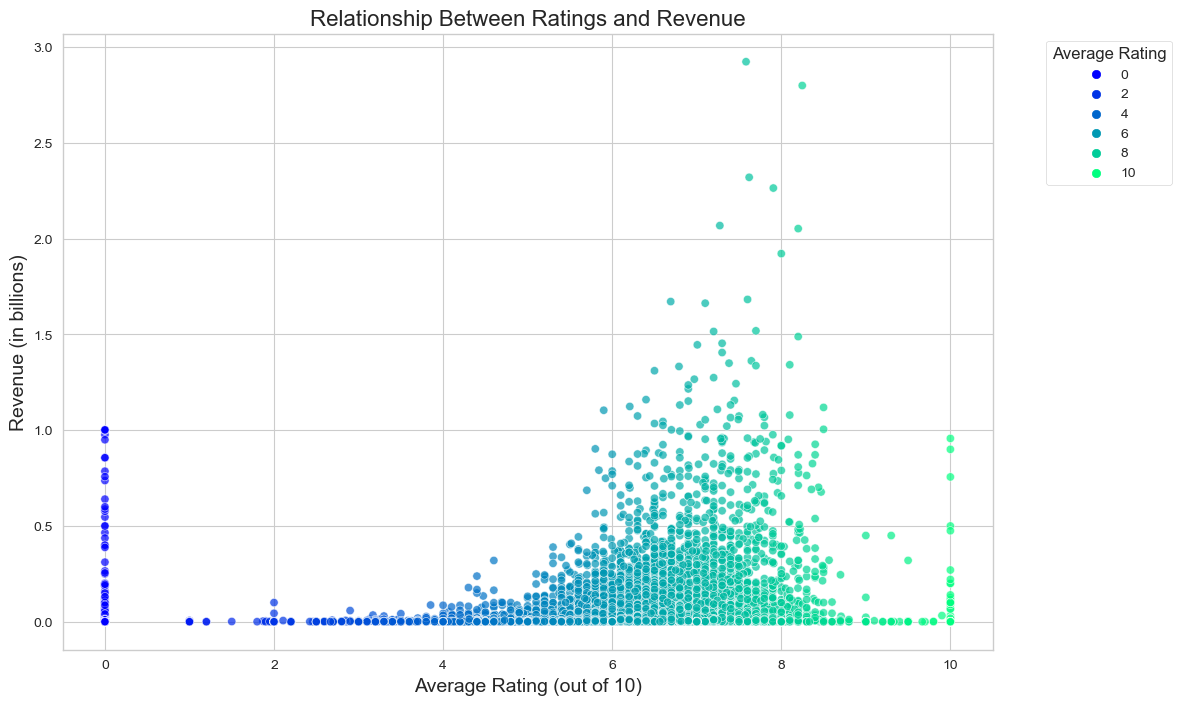

In [277]:
df_clean = df[['vote_average', 'revenue']].dropna()

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df_clean['vote_average'],
    y=df_clean['revenue'] / 1e9,  
    hue=df_clean['vote_average'],
    palette='winter',
    alpha=0.7
)
legend = plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    title='Average Rating'
)
plt.setp(legend.get_title(), fontsize=12) 


plt.title('Relationship Between Ratings and Revenue', fontsize=16)
plt.xlabel('Average Rating (out of 10)', fontsize=14)
plt.ylabel('Revenue (in billions)', fontsize=14)
plt.grid(True)
plt.show()

The scatterplot shows a general trend that higher-rated movies (closer to 10) tend to generate more revenue. However, there are also highly-rated movies with lower revenue, emphasizing that high ratings alone don't guarantee high revenue.

## IMDB Ratings and Revenue

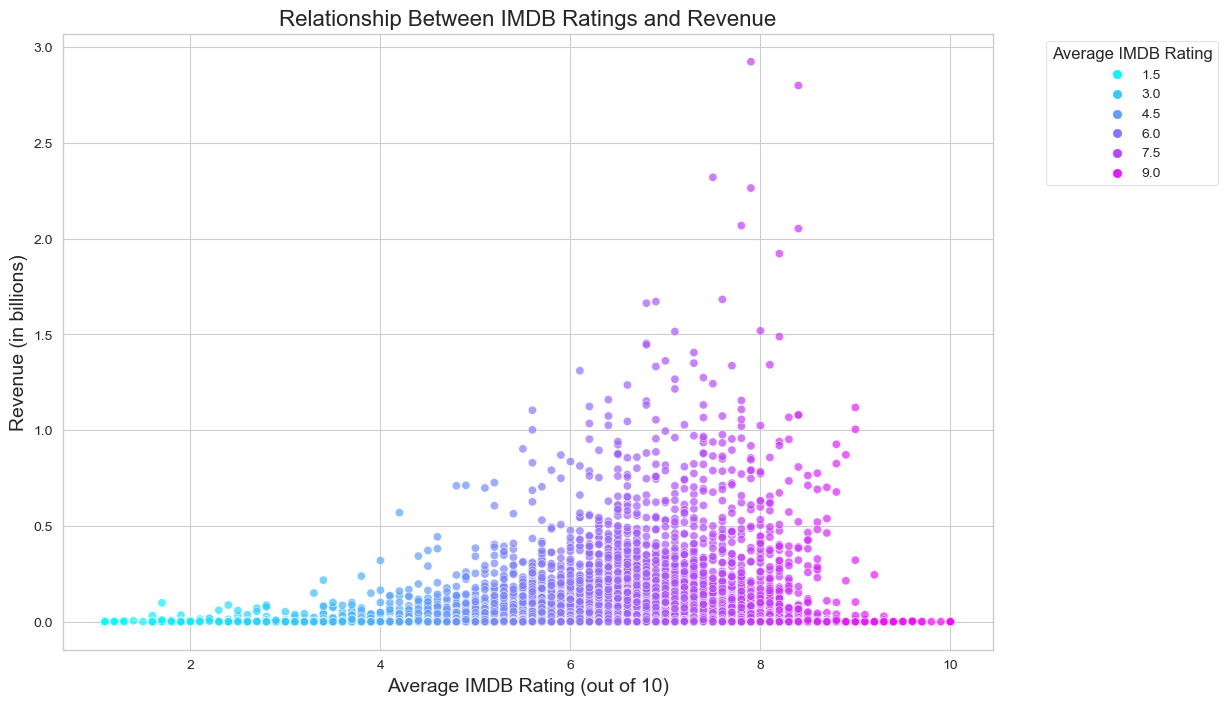

In [278]:
df_clean = df[['imdb_rating', 'revenue']].dropna()

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df_clean['imdb_rating'],
    y=df_clean['revenue'] / 1e9,  
    hue=df_clean['imdb_rating'],
    palette='cool',
    alpha=0.7
)
legend = plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    title='Average IMDB Rating'
)
plt.setp(legend.get_title(), fontsize=12) 

plt.title('Relationship Between IMDB Ratings and Revenue', fontsize=16)
plt.xlabel('Average IMDB Rating (out of 10)', fontsize=14)
plt.ylabel('Revenue (in billions)', fontsize=14)
plt.grid(True)
plt.show()

This scatterplot focuses on IMDb ratings specifically, showing a similar pattern as the first: movies with higher IMDb ratings tend to cluster towards higher revenues. The distribution is more concentrated, with fewer movies at extreme revenue values.

## Comparing IMDB rating and Vote average

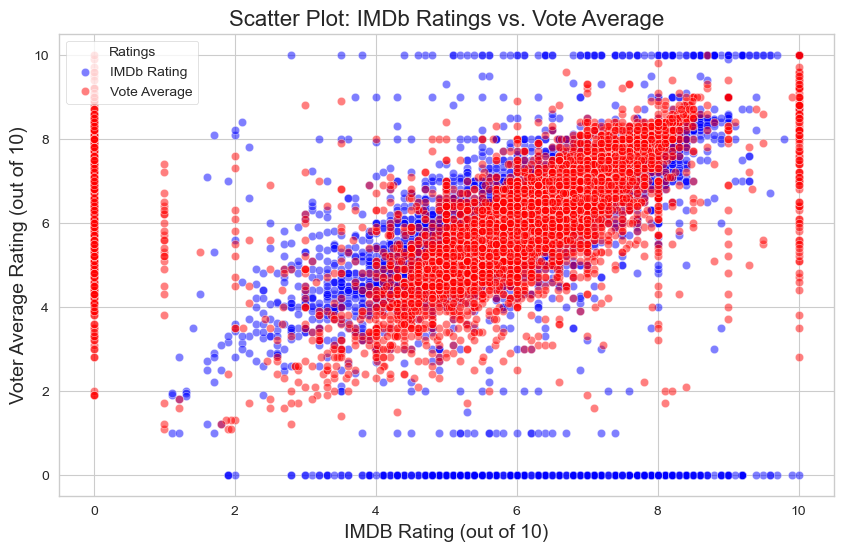

In [279]:
df_clean = df[['imdb_rating', 'vote_average']].dropna()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_clean['imdb_rating'], y=df_clean['vote_average'], color='blue', label='IMDb Rating', alpha=0.5)
sns.scatterplot(x=df_clean['vote_average'], y=df_clean['imdb_rating'], color='red', label='Vote Average', alpha=0.5)
plt.title('Scatter Plot: IMDb Ratings vs. Vote Average', fontsize=16)
plt.xlabel('IMDB Rating (out of 10)', fontsize=14)
plt.ylabel('Voter Average Rating (out of 10)', fontsize=14)
plt.legend(title='Ratings', loc='upper left')
plt.grid(True)
plt.show()

This scatterplot uses two distinct colors (blue for IMDb Rating and red for Vote Average) to distinguish between the two rating systems. It highlights the strong correlation between them, as most points follow a diagonal trend. However, differences in specific clusters suggest slight discrepancies between the two metrics. The visualization effectively shows overlaps and deviations, providing a comprehensive comparison

## Words most popular used in Movie Titles, Descriptions, and Taglines

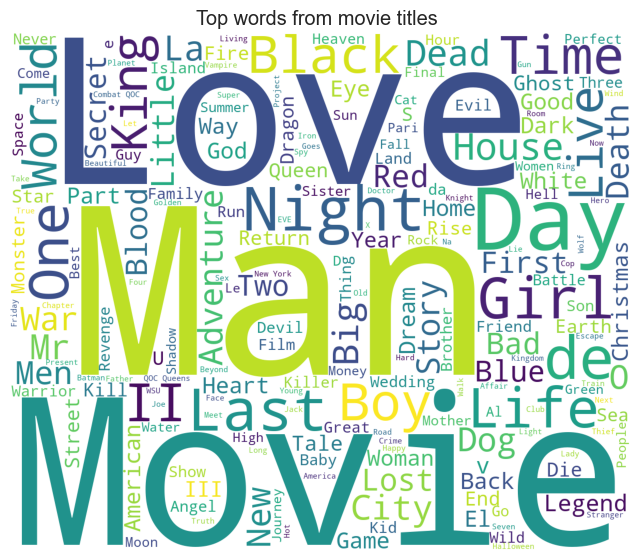

In [280]:
# Movie titles
plt.figure(figsize = (8, 8))
title = ' '.join(df['title'].values) 
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(title)
plt.imshow(wordcloud)
plt.title('Top words from movie titles ')
plt.axis("off") 
plt.show()

Most common words in movie titles include Movie, Man and Love, Day

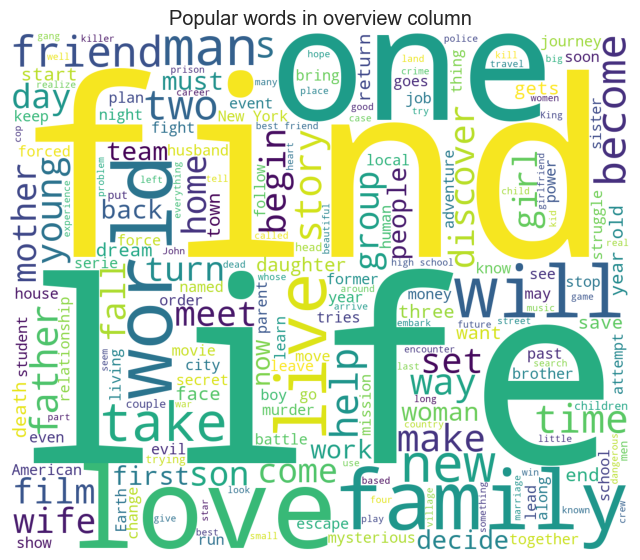

In [281]:
# Movie Descriptions
plt.figure(figsize = (8, 8))
text = ' '.join(df['overview'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Popular words in overview column')
plt.axis("off")
plt.show()

Most common words in movie descriptions is find, life, one, love.

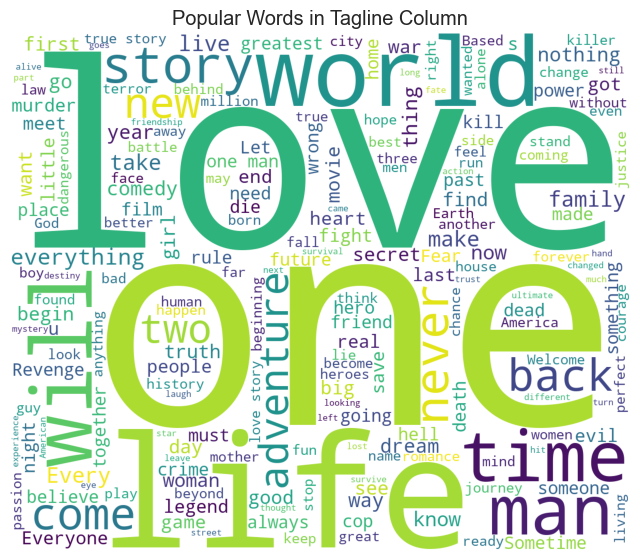

In [282]:
# Movie Taglines
plt.figure(figsize=(8, 8))
tag = ' '.join(df['tagline'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(tag)
plt.imshow(wordcloud)
plt.title('Popular Words in Tagline Column')
plt.axis("off")
plt.show()

Most common words used in movie taglines include love, life, one.

## Does the film description affect revenue?

In [283]:
vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),
    min_df=5
)

overview_text = vectorizer.fit_transform(df['overview'].fillna(''))
linreg = LinearRegression()
linreg.fit(overview_text, df['log_revenue'])
eli5.show_weights(
    linreg,
    feature_names=vectorizer.get_feature_names_out(),
    top=20,
    feature_filter=lambda x: x != '<BIAS>'
)

It appears that words from the film description does appear to affect revenue. Words extracted from the descriptions, such as bulma, investigative reporter, and a thrilling have strong positive weights, suggesting they significantly contribute to higher revenue predictions. Conversely, words like forgets, gossip, and kids go negatively influence revenue predictions. This indicates that the content and themes emphasized in a film’s description can play a meaningful role in determining its financial performance.

In [284]:
# looking at random movie

print('Target value:', df['log_revenue'][1150])

eli5.show_prediction(
    linreg,
    doc=df['overview'].values[1150],
    vec=vectorizer,
    feature_names=vectorizer.get_feature_names_out()
)

Target value: 12.325170372157093


This output shows the importance of individual words or phrases from the selected movie's description in predicting its revenue. The **Target value** (17.59) is the log-transformed revenue for this movie, and the **y** (score 12.325) represents the model's prediction based on the description.

# <span style="color:red">Featured Engineering</span>

In [285]:
df['release_date'].head()

0    1995-12-09
1    1993-10-15
2    1977-05-25
3    2003-05-30
4    1994-06-23
Name: release_date, dtype: object

In [286]:
def process_date(df_date):
    df_date['release_date'] = pd.to_datetime(df_date['release_date'], errors='coerce')
    df_date = df_date.loc[df_date['release_date'].notna()].copy() 
    date_parts = ["year", "weekday", "month", "day", "quarter"]
    for part in date_parts:
        part_col = f'release_date_{part}'
        df_date.loc[:, part_col] = getattr(df_date['release_date'].dt, part)
    df_date.loc[:, "release_date_weekofyear"] = df_date['release_date'].dt.isocalendar().week
    
    return df_date

df = process_date(df)
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,cast,director,writers,producers,imdb_rating,imdb_votes,log_revenue,log_budget,production_companies_list,genre_pairs,release_date_year,release_date_weekday,release_date_month,release_date_day,release_date_quarter,release_date_weekofyear
0,5,Four Rooms,5.800,2623.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,18.079,Twelve outrageous guests. Four scandalous requ...,[Comedy],"Miramax, A Band Apart",United States of America,English,"Quentin Tarantino, Jennifer Beals, Antonio Ban...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Quentin Tarantino, Lawrenc...",6.7,112605.0,15.264159,15.201805,"[Miramax, A Band Apart]",[],1995,5,12,9,4,49
1,6,Judgment Night,6.500,331.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,en,Judgment Night,"Four young friends, while taking a shortcut en...",8.924,Don't move. Don't whisper. Don't even breathe.,"[Action, Crime, Thriller]","Largo Entertainment, JVC, Universal Pictures",United States of America,English,"Cuba Gooding Jr., Peter Greene, David L. Crowl...",Stephen Hopkins,"Jere Cunningham, Lewis Colick","Gene Levy, Lloyd Segan, Marilyn Vance",6.6,19303.0,16.311764,16.860033,"[Largo Entertainment, JVC, Universal Pictures]","[(Action, Crime), (Action, Thriller), ( Crim...",1993,4,10,15,4,41
2,11,Star Wars,8.204,20541.0,Released,1977-05-25,775398007.0,121.0,11000000.0,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,83.114,"A long time ago in a galaxy far, far away...","[Adventure, Action, Science Fiction]","Lucasfilm Ltd., 20th Century Fox",United States of America,English,"Lightning Bear, Geoffrey Moon, Alfie Curtis, G...",George Lucas,George Lucas,"George Lucas, Rick McCallum, Gary Kurtz",8.6,1478201.0,20.468887,16.213406,"[Lucasfilm Ltd., 20th Century Fox]","[(Adventure, Action), (Adventure, Science Fi...",1977,2,5,25,2,21
3,12,Finding Nemo,7.819,19180.0,Released,2003-05-30,940335536.0,100.0,94000000.0,tt0266543,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",102.869,There are 3.7 trillion fish in the ocean. They...,"[Animation, Family]",Pixar,United States of America,English,"Bob Bergen, Ellen DeGeneres, Joe Ranft, Elizab...",Andrew Stanton,"Jim Capobianco, Blake Tucker, Andrew Stanton, ...","Graham Walters, John Lasseter",8.2,1135995.0,20.661747,18.358805,[Pixar],"[(Animation, Family)]",2003,4,5,30,2,22
4,13,Forrest Gump,8.471,27381.0,Released,1994-06-23,677387716.0,142.0,55000000.0,tt0109830,en,Forrest Gump,A man with a low IQ has accomplished great thi...,90.795,The world will never be the same once you've s...,"[Comedy, Drama, Romance]","Paramount Pictures, The Steve Tisch Company, W...",United States of America,English,"Juan Singleton, Christopher James Hall, Elvis ...",Robert Zemeckis,"Winston Groom, Eric Roth","Steve Tisch, Steve Starkey, Wendy Finerman",8.8,2318314.0,20.333754,17.822844,"[Paramount Pictures, The Steve Tisch Company, ...","[(Comedy, Drama), (Comedy, Romance), ( Drama...",1994,3,6,23,2,25


## Number of movies released by year

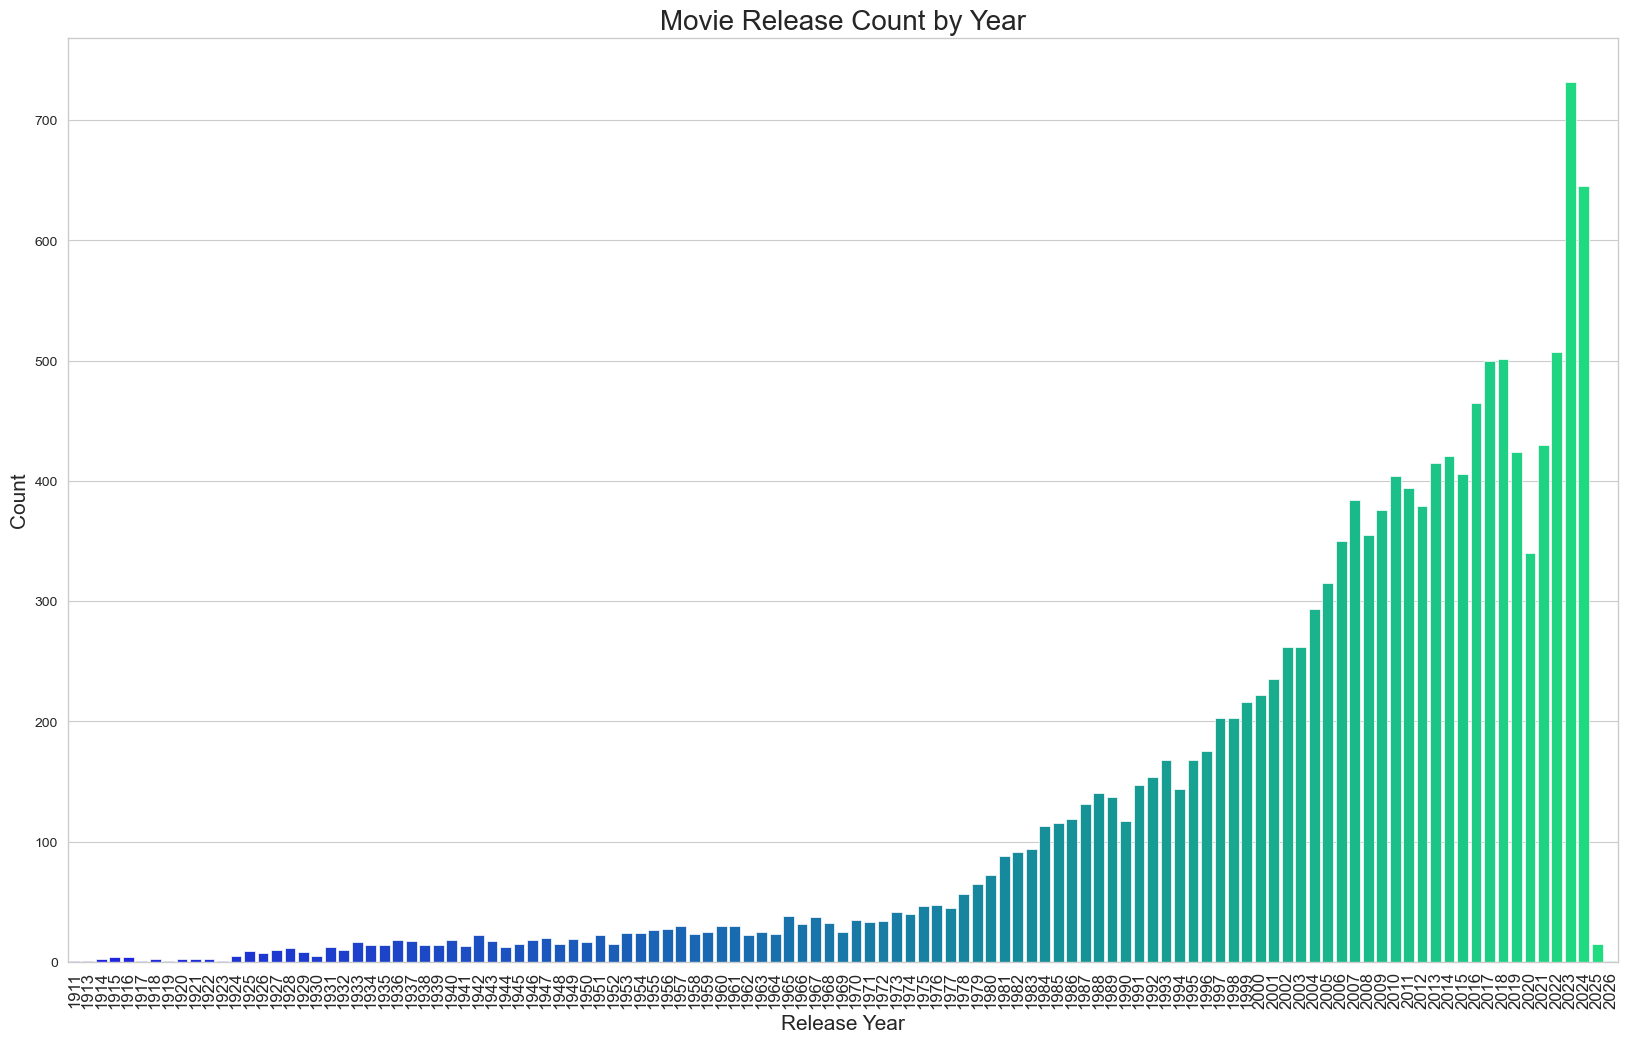

In [287]:
d1 = df['release_date_year'].value_counts().sort_index()
data = go.Scatter(x=d1.index, y=d1.values, name='movies data')
layout = go.Layout(title = "Number of films per year", xaxis_title = 'Release date in Year',yaxis_title = 'Movie Count')
py.iplot(dict(data=data, layout=layout))

plt.figure(figsize=(20, 12))
sns.countplot(
    x='release_date_year', 
    data=df.sort_values(by='release_date_year'),
    order=df['release_date_year'].value_counts().sort_index().index,
    palette='winter'
)
plt.title("Movie Release Count by Year", fontsize=20)
plt.xticks(fontsize=12, rotation=90)
plt.xlabel("Release Year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

The charts shows the number of movies released each year, with a clear increase over time, especially in recent decades. 2023 has had the most released movies with 732 movies.

In [288]:
#plot for release date vs revenue
d1 = df['release_date_year'].value_counts().sort_index()
d2 = df.groupby(['release_date_year'])['revenue'].mean()

data = [go.Scatter(x=d1.index, y=d1.values, name='film count'),
        go.Scatter(x=d2.index, y=d2.values, name='mean revenue', yaxis='y2')]

layout = go.Layout(dict(title = "Number of films and average revenue per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  yaxis2=dict(title='Average revenue', overlaying='y', side='right')
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

The chart visualizes the relationship between the number of films released each year (blue line) and the average revenue per film (red line) over time. While the number of films steadily increases, especially after 2000, the average revenue shows fluctuations, with significant peaks and drops. This suggests that despite more films being released, revenue trends are influenced by other factors like individual blockbuster successes or economic conditions.

## Does Release Date Affect Revenue ?

<Figure size 2000x500 with 0 Axes>

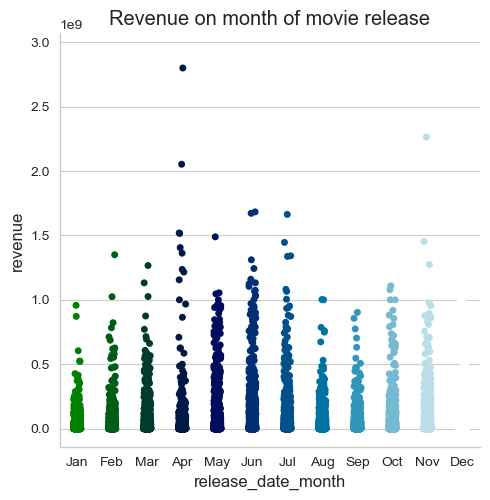

In [289]:
plt.figure(figsize=(20,5));
sns.catplot(x='release_date_month', y='revenue', hue='release_date_month', palette='ocean', data=df);
plt.title('Revenue on month of movie release');
loc, labels = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels,fontsize=10)
plt.show()

This visualization shows the distribution of movie revenue across each month of the year. It suggests that May, June, and December are strong months for revenue, likely reflecting popular holiday and summer release strategies.

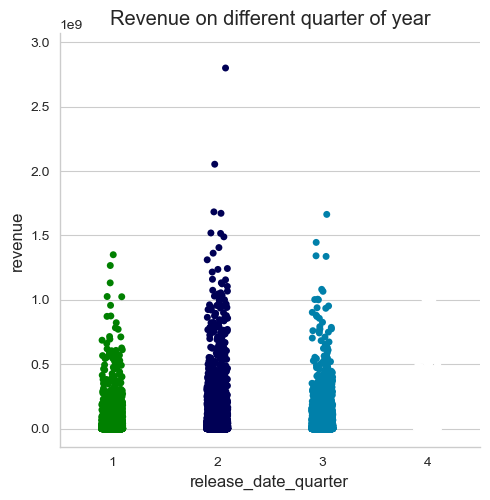

In [290]:
sns.catplot(x='release_date_quarter', y='revenue', hue='release_date_quarter', palette='ocean', data=df);
plt.title('Revenue on different quarter of year');

Grouping by quarters reveals a similar pattern, with the second (april-june) and fourth (October-December) quarters generating higher revenue, consistent with blockbuster seasons in late spring and winter.

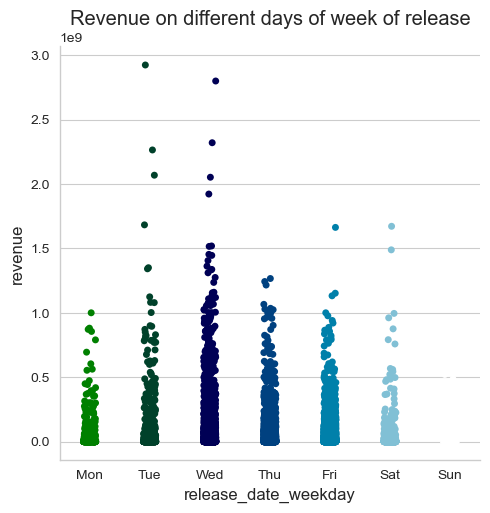

In [291]:
sns.catplot(x='release_date_weekday', y='revenue', hue='release_date_weekday', palette='ocean', data=df);
plt.title('Revenue on different days of week of release');
loc, labels = plt.xticks()
#putting label for days
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels)
plt.show()

This plot highlights weekday revenue patterns, showing that mid-week releases, particularly on Wednesdays, tend to have notable revenue peaks.

## Top 20 Movies by Revenue

In [292]:
#top 20 movie by revenue
top_20_movies =  df.sort_values(by='revenue', ascending=False).head(20)[['title','revenue','release_date_year']]
top_20_movies

,title,revenue,release_date_year
4342,Avatar,2.923706e+09,2009
8562,Avengers: Endgame,2.799439e+09,2019
6801,Avatar: The Way of Water,2.320250e+09,2022
345,Titanic,2.264162e+09,1997
7485,Star Wars: The Force Awakens,2.068224e+09,2015
8563,Avengers: Infinity War,2.052415e+09,2018
11019,Spider-Man: No Way Home,1.921847e+09,2021
12646,Inside Out 2,1.682636e+09,2024
7447,Jurassic World,1.671537e+09,2015
9474,The Lion King,1.663000e+09,2019


## Relation between Runtime and Revenue

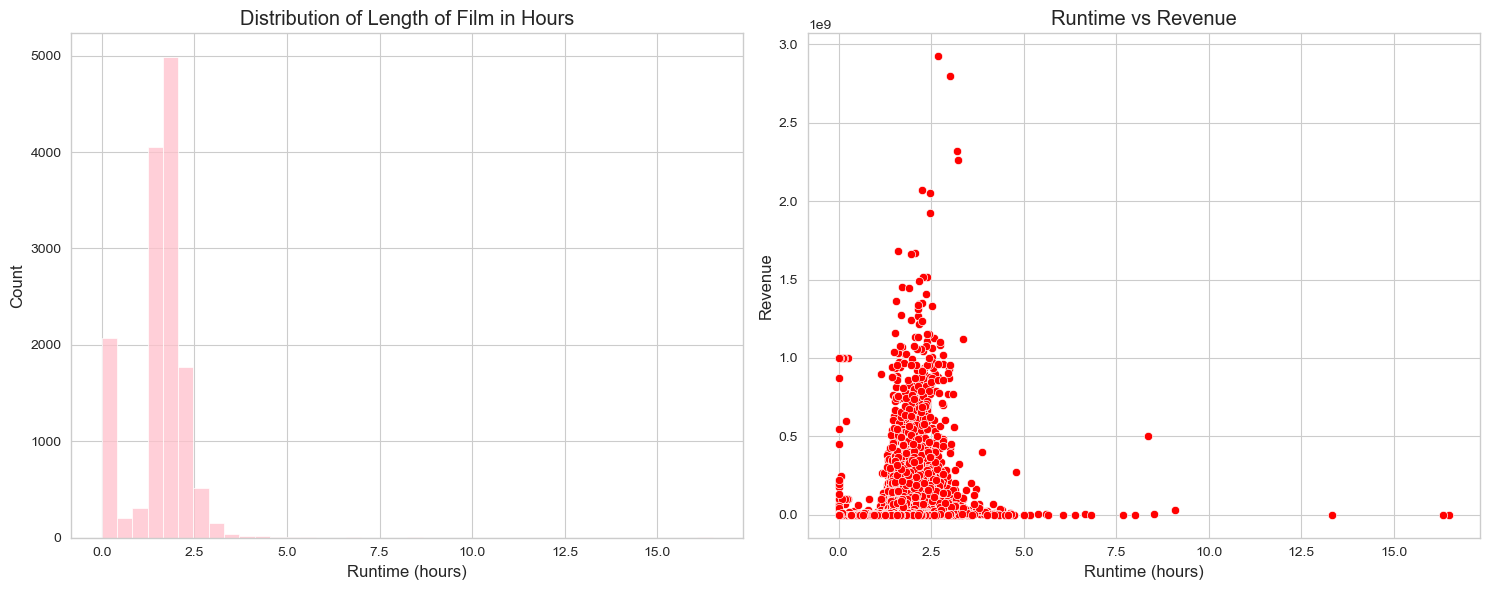

In [293]:
plt.figure(figsize=(15, 6))

# Distribution of runtime in hours
plt.subplot(1, 2, 1)
sns.histplot(df['runtime'].fillna(0) / 60, bins=40, kde=False, color='pink')
plt.title('Distribution of Length of Film in Hours')
plt.xlabel('Runtime (hours)')
plt.ylabel('Count')

# Scatter plot of runtime vs revenue
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['runtime'].fillna(0) / 60, y=df['revenue'], color='red')
plt.title('Runtime vs Revenue')
plt.xlabel('Runtime (hours)')
plt.ylabel('Revenue')

plt.tight_layout()
plt.show()


**fig 1(Left)**: This histogram shows the frequency of movie runtimes. The majority of films are clustered between 1.5 and 2.5 hours. There are very few movies with extremely short or long runtimes.

**fig 2 (Right)**: This scatter plot explores the relationship between a movie’s runtime and its revenue. Films with runtimes close to 2 hours tend to have higher revenues. However, longer runtimes don't show a strong relationship with increased revenue, and some of these outliers may even have low earnings. This suggests that runtime alone does not guarantee financial success.

# <span style="color:red">Model Prediction</span>

In [532]:
data_all = pd.concat([df, genres_features],axis=1, sort=False)
data_all.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,cast,director,writers,producers,imdb_rating,imdb_votes,log_revenue,log_budget,production_companies_list,genre_pairs,release_date_year,release_date_weekday,release_date_month,release_date_day,release_date_quarter,release_date_weekofyear,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,5.00,Four Rooms,5.80,2623.00,Released,1995-12-09,4257354.00,98.00,4000000.00,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,18.08,Twelve outrageous guests. Four scandalous requ...,[Comedy],"Miramax, A Band Apart",United States of America,English,"Quentin Tarantino, Jennifer Beals, Antonio Ban...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Quentin Tarantino, Lawrenc...",6.70,112605.00,15.26,15.20,"[Miramax, A Band Apart]",[],1995.00,5.00,12.00,9.00,4.00,49,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,6.00,Judgment Night,6.50,331.00,Released,1993-10-15,12136938.00,109.00,21000000.00,tt0107286,en,Judgment Night,"Four young friends, while taking a shortcut en...",8.92,Don't move. Don't whisper. Don't even breathe.,"[Action, Crime, Thriller]","Largo Entertainment, JVC, Universal Pictures",United States of America,English,"Cuba Gooding Jr., Peter Greene, David L. Crowl...",Stephen Hopkins,"Jere Cunningham, Lewis Colick","Gene Levy, Lloyd Segan, Marilyn Vance",6.60,19303.00,16.31,16.86,"[Largo Entertainment, JVC, Universal Pictures]","[(Action, Crime), (Action, Thriller), ( Crim...",1993.00,4.00,10.00,15.00,4.00,41,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,11.00,Star Wars,8.20,20541.00,Released,1977-05-25,775398007.00,121.00,11000000.00,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,83.11,"A long time ago in a galaxy far, far away...","[Adventure, Action, Science Fiction]","Lucasfilm Ltd., 20th Century Fox",United States of America,English,"Lightning Bear, Geoffrey Moon, Alfie Curtis, G...",George Lucas,George Lucas,"George Lucas, Rick McCallum, Gary Kurtz",8.60,1478201.00,20.47,16.21,"[Lucasfilm Ltd., 20th Century Fox]","[(Adventure, Action), (Adventure, Science Fi...",1977.00,2.00,5.00,25.00,2.00,21,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
3,12.00,Finding Nemo,7.82,19180.00,Released,2003-05-30,940335536.00,100.00,94000000.00,tt0266543,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",102.87,There are 3.7 trillion fish in the ocean. They...,"[Animation, Family]",Pixar,United States of America,English,"Bob Bergen, Ellen DeGeneres, Joe Ranft, Elizab...",Andrew Stanton,"Jim Capobianco, Blake Tucker, Andrew Stanton, ...","Graham Walters, John Lasseter",8.20,1135995.00,20.66,18.36,[Pixar],"[(Animation, Family)]",2003.00,4.00,5.00,30.00,2.00,22,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,13.00,Forrest Gump,8.47,27381.00,Released,1994-06-23,677387716.00,142.00,55000000.00,tt0109830,en,Forrest Gump,A man with a low IQ has accomplished great thi...,90.80,The world will never be the same once you've s...,"[Comedy, Drama, Romance]","Paramount Pictures, The Steve Tisch Company, W...",United States of America,English,"Juan Singleton, Christopher James Hall, Elvis ...",Robert Zemeckis,"Winston Groom, Eric Roth","Steve Tisch, Steve Starkey, Wendy Finerman",8.80,2318314.00,20.33,17.82,"[Paramount Pictures, The Steve Tisch Company, ...","[(Comedy, Drama), (Comedy, Romance), ( Drama...",1994.00,3.00,6.00,23.00,2.00,25,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00

In [533]:
data_all.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'cast', 'director', 'writers', 'producers', 'imdb_rating', 'imdb_votes',
       'log_revenue', 'log_budget', 'production_companies_list', 'genre_pairs',
       'release_date_year', 'release_date_weekday', 'release_date_month',
       'release_date_day', 'release_date_quarter', 'release_date_weekofyear',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [534]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14561 entries, 0 to 15237
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         14171 non-null  float64       
 1   title                      14171 non-null  object        
 2   vote_average               14171 non-null  float64       
 3   vote_count                 14171 non-null  float64       
 4   status                     14171 non-null  object        
 5   release_date               14171 non-null  datetime64[ns]
 6   revenue                    14171 non-null  float64       
 7   runtime                    14171 non-null  float64       
 8   budget                     14171 non-null  float64       
 9   imdb_id                    12210 non-null  object        
 10  original_language          14171 non-null  object        
 11  original_title             14171 non-null  object        
 12  over

In [535]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_train=data_all.select_dtypes(include=numerics)

In [536]:
df_train.drop(columns=['id'],inplace=True)
df_train=df_train.fillna(df_train.median())

In [537]:
df_train.columns

Index(['vote_average', 'vote_count', 'revenue', 'runtime', 'budget',
       'popularity', 'imdb_rating', 'imdb_votes', 'log_revenue', 'log_budget',
       'release_date_year', 'release_date_weekday', 'release_date_month',
       'release_date_day', 'release_date_quarter', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [538]:
df_train.head()

,vote_average,vote_count,revenue,runtime,budget,popularity,imdb_rating,imdb_votes,log_revenue,log_budget,release_date_year,release_date_weekday,release_date_month,release_date_day,release_date_quarter,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,5.80,2623.00,4257354.00,98.00,4000000.00,18.08,6.70,112605.00,15.26,15.20,1995.00,5.00,12.00,9.00,4.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,6.50,331.00,12136938.00,109.00,21000000.00,8.92,6.60,19303.00,16.31,16.86,1993.00,4.00,10.00,15.00,4.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,8.20,20541.00,775398007.00,121.00,11000000.00,83.11,8.60,1478201.00,20.47,16.21,1977.00,2.00,5.00,25.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
3,7.82,19180.00,940335536.00,100.00,94000000.00,102.87,8.20,1135995.00,20.66,18.36,2003.00,4.00,5.00,30.00,2.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,8.47,27381.00,677387716.00,142.00,55000000.00,90.80,8.80,2318314.00,20.33,17.82,1994.00,3.00,6.00,23.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00


In [539]:
X = df_train.drop(['revenue', 'log_revenue'], axis=1)
y = df_train['revenue']

In [540]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [541]:
#linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_preds = lm.predict(X_test)
print("Linear Regression R Square: ", r2_score(y_test, lm_preds))

Linear Regression R Square:  0.6693509844406704


In [542]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train the Linear Regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Predict on the test set
lm_preds = lm.predict(X_test)

# Ensure predictions match the size of y_test
assert len(lm_preds) == len(y_test), "Mismatch between y_test and lm_preds lengths!"

# Calculate metrics
mae = mean_absolute_error(y_test, lm_preds)
rmse = np.sqrt(mean_squared_error(y_test, lm_preds))
r2 = r2_score(y_test, lm_preds)

# Print the results
print(f"Linear Regression R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): ${mae / 1e6:.2f}M")
print(f"Root Mean Squared Error (RMSE): ${rmse / 1e6:.2f}M")


Linear Regression R² Score: 0.67
Mean Absolute Error (MAE): $34.19M
Root Mean Squared Error (RMSE): $81.10M


R Square value is 67%

In [543]:
#random forest
RF_model = RandomForestRegressor(random_state =0, n_estimators=500, max_depth=10)
RF_model.fit(X_train, y_train)

y_hat = RF_model.predict(X_test)
print ("Random Forest R Square:", metrics.r2_score(y_hat, y_test))

AttributeError: 'list' object has no attribute 'r2_score'

In [545]:
#random forest
RF_model = RandomForestRegressor(random_state =0, n_estimators=500, max_depth=10)
RF_model.fit(X_train, y_train)

y_hat = RF_model.predict(X_test)

# Ensure predictions match the size of y_test
assert len(y_test) == len(y_hat), "Mismatch between y_test and lm_preds lengths!"

# Calculate metrics
mae = mean_absolute_error(y_hat, y_test)
rmse = np.sqrt(mean_squared_error(y_hat, y_test))
r2 = r2_score(y_hat, y_test)

# Print the results
print(f"Linear Regression R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): ${mae / 1e6:.2f}M")
print(f"Root Mean Squared Error (RMSE): ${rmse / 1e6:.2f}M")

Linear Regression R² Score: 0.64
Mean Absolute Error (MAE): $26.73M
Root Mean Squared Error (RMSE): $73.87M


Random Forest is 64% accurate 

                      importance
feature                         
vote_count                  0.39
log_budget                  0.21
budget                      0.20
popularity                  0.05
runtime                     0.03
release_date_year           0.02
imdb_votes                  0.02
vote_average                0.01
release_date_day            0.01
release_date_month          0.01
Adventure                   0.01
imdb_rating                 0.01
release_date_weekday        0.01
Science Fiction             0.00
Thriller                    0.00
Fantasy                     0.00
Family                      0.00
Drama                       0.00
Comedy                      0.00
Animation                   0.00
Action                      0.00
release_date_quarter        0.00
Crime                       0.00
Music                       0.00
Mystery                     0.00
Romance                     0.00
War                         0.00
Documentary                 0.00
History   

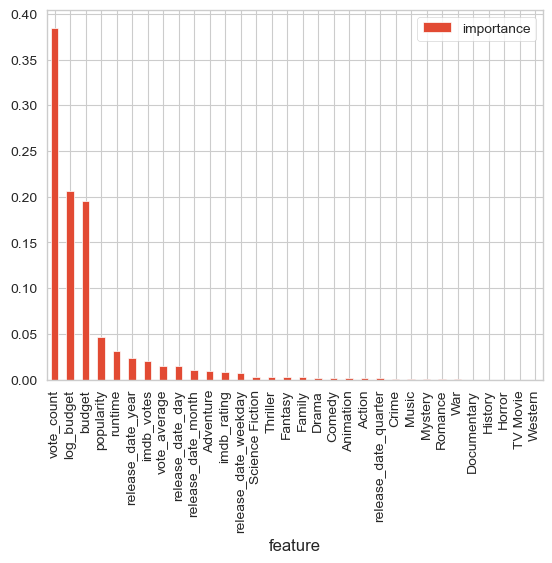

In [546]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(RF_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature');
print(importances)
importances.plot.bar();

vote count, budget, popularity, imdb votes, runtime, and release date year has the most weight on the feature.

## LightGBM (LGB) Model

In [547]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

In [548]:
lgb_model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread = 4, n_jobs = -1)

In [549]:
lgb_model = lgb.LGBMRegressor(**params, n_estimators=10000, n_jobs=-1)
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric='rmse',
    callbacks=[early_stopping(stopping_rounds=200)]
)
eli5.show_weights(lgb_model, feature_filter=lambda x: x != '<BIAS>')

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[407]	valid_0's rmse: 6.71461e+07


Weight,Feature
0.4792,vote_count
0.3321,budget
0.0440,popularity
0.0286,log_budget
0.0251,imdb_votes
0.0239,release_date_year
0.0129,imdb_rating
0.0112,runtime
0.0107,Adventure
0.0097,vote_average


## Gradient Boosting Regressor

In [550]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': .01, 'loss': 'squared_error'} 
clf = ensemble.GradientBoostingRegressor(**params)
predictions2 = clf.fit(X_train,y_train)
training_score = clf.score(X_train, y_train)
print(f"Training Score: {training_score}")

Training Score: 0.8571486449683827


In [551]:
predictions2 = np.expand_dims(clf.predict(X_test), axis = 1)
MSE = mean_squared_error(y_test, predictions2)
r2 = clf.score(X_test, y_test)
print(f"Mean Squared Error: {MSE}, R Square: {r2}")

Mean Squared Error: 3428215601495924.5, R Square: 0.8276436005308976


The R Square is much better using the GB booster than the other model. Here the R Square is 83%

In [453]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define parameters for Gradient Boosting
params = {
    'n_estimators': 500,
    'max_depth': 4,
    'min_samples_split': 2,
    'learning_rate': 0.01,
    'loss': 'squared_error'
}

# Initialize and train the Gradient Boosting Regressor
clf = GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)

# Predict on the test set
gb_preds = clf.predict(X_test)

# Calculate metrics

r2 = clf.score(X_test, y_test)
mae = mean_absolute_error(y_test, gb_preds)
rmse = np.sqrt(mean_squared_error(y_test, gb_preds))

# Print the results
print(f"Gradient Boosting Training Score: {clf.score(X_train, y_train):.2f}")
print(f"Gradient Boosting R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): ${mae / 1e6:.2f}M")
print(f"Root Mean Squared Error (RMSE): ${rmse / 1e6:.2f}M")


Gradient Boosting Training Score: 0.85
Gradient Boosting R² Score: 0.84
Mean Absolute Error (MAE): $23.84M
Root Mean Squared Error (RMSE): $55.55M


In [552]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=500, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
xgb_preds = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, xgb_preds)
r2 = r2_score(y_test, xgb_preds)

print(f"XGBoost - Mean Squared Error: {mse:.2f}, R2 Score: {r2:.2f}")


XGBoost - Mean Squared Error: 982243431109970.38, R2 Score: 0.95


In [455]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=500, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)
r2 = r2_score(y_test, xgb_preds)
mae = mean_absolute_error(y_test, xgb_preds)
rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))

# Print the results
print(f"Gradient Boosting Training Score: {clf.score(X_train, y_train):.2f}")
print(f"Gradient Boosting R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): ${mae / 1e6:.2f}M")
print(f"Root Mean Squared Error (RMSE): ${rmse / 1e6:.2f}M")


Gradient Boosting Training Score: 0.85
Gradient Boosting R² Score: 0.95
Mean Absolute Error (MAE): $12.98M
Root Mean Squared Error (RMSE): $32.11M


In [460]:
import pandas as pd

# Input metrics for each model
metrics = [
    {"Model": "Linear Regression", "R² Score": 0.67, "MAE": "$34.19M", "RMSE": "$81.10M"},
    {"Model": "Random Forest", "R² Score": 0.64, "MAE": "$26.73M", "RMSE": "$73.87M"},
    {"Model": "Gradient Boosting", "R² Score": 0.84, "MAE": "$23.84M", "RMSE": "$55.55M"},
    {"Model": "XGBoost", "R² Score": 0.95, "MAE": "$12.98M", "RMSE": "$32.11M"}
]

# Create a DataFrame from the input data
results_df = pd.DataFrame(metrics)

results_df

,Model,R² Score,MAE,RMSE
0,Linear Regression,0.67,$34.19M,$81.10M
1,Random Forest,0.64,$26.73M,$73.87M
2,Gradient Boosting,0.84,$23.84M,$55.55M
3,XGBoost,0.95,$12.98M,$32.11M


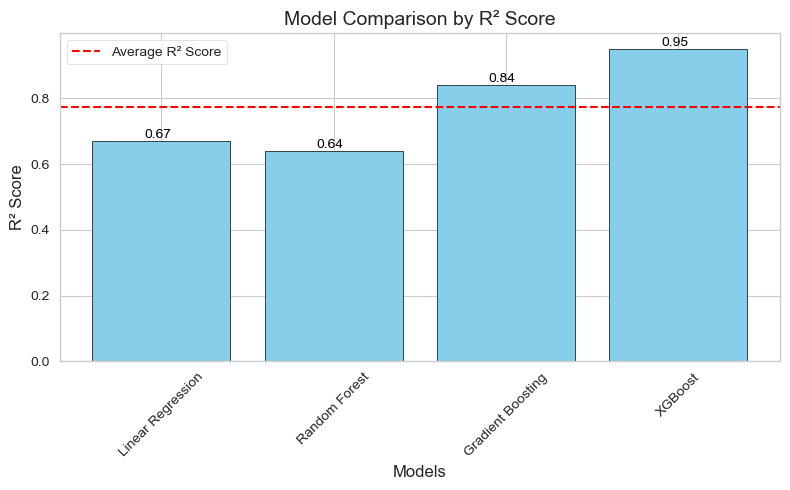

In [462]:
import matplotlib.pyplot as plt

# Data for plotting
models = ["Linear Regression", "Random Forest", "Gradient Boosting", "XGBoost"]
r2_scores = [0.67, 0.64, 0.84, 0.95]

# Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(models, r2_scores, color="skyblue", edgecolor="black")
plt.axhline(y=sum(r2_scores)/len(r2_scores), color="red", linestyle="--", label="Average R² Score")

# Adding text labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 0.01, 
             f"{bar.get_height():.2f}", fontsize=10, color="black")

# Chart formatting
plt.title("Model Comparison by R² Score", fontsize=14)
plt.ylabel("R² Score", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [312]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split': [2, 5, 10]
}

# Initialize model and perform grid search
gbm = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gbm, param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate on test set
test_r2 = best_model.score(X_test, y_test)
print(f"Test R2 Score with Best Parameters: {test_r2:.2f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
Test R2 Score with Best Parameters: 0.92


In [461]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# Define base models
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Define stacking model
stack_model = StackingRegressor(estimators=estimators, final_estimator=Ridge())
stack_model.fit(X_train, y_train)

# Predictions and evaluation
stack_preds = stack_model.predict(X_test)
mse = mean_squared_error(y_test, stack_preds)
r2 = r2_score(y_test, stack_preds)

print(f"Stacking Model - Mean Squared Error: {mse:.2f}, R2 Score: {r2:.2f}")


Stacking Model - Mean Squared Error: 2147116822581320.00, R2 Score: 0.89


In [314]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Recursive Feature Elimination
rfe = RFE(estimator=RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=10)
rfe.fit(X_train, y_train)

# Features selected
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Use only selected features for the model
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train model with selected features
rf_rfe_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_rfe_model.fit(X_train_rfe, y_train)

# Evaluate
rfe_preds = rf_rfe_model.predict(X_test_rfe)
rfe_r2 = r2_score(y_test, rfe_preds)
print(f"RFE Model R2 Score: {rfe_r2:.2f}")


[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=300; total time=   9.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500; total time=  41.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500; total time=  19.9s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500; total time=  25.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=300; total time=  22.7s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100; total time=   7.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=300; total time=  19.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500; total time=  45.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=300; total time=  22.4s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=2, n_estimators=100; total time=   9.0

In [315]:
from sklearn.model_selection import cross_val_score

# Perform K-Fold Cross-Validation
cv_scores = cross_val_score(GradientBoostingRegressor(random_state=42), X, y, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean R2 Score: {cv_scores.mean():.2f}")


Cross-Validation R2 Scores: [0.70568249 0.78360523 0.81388278 0.67840596 0.28881243]
Mean R2 Score: 0.65


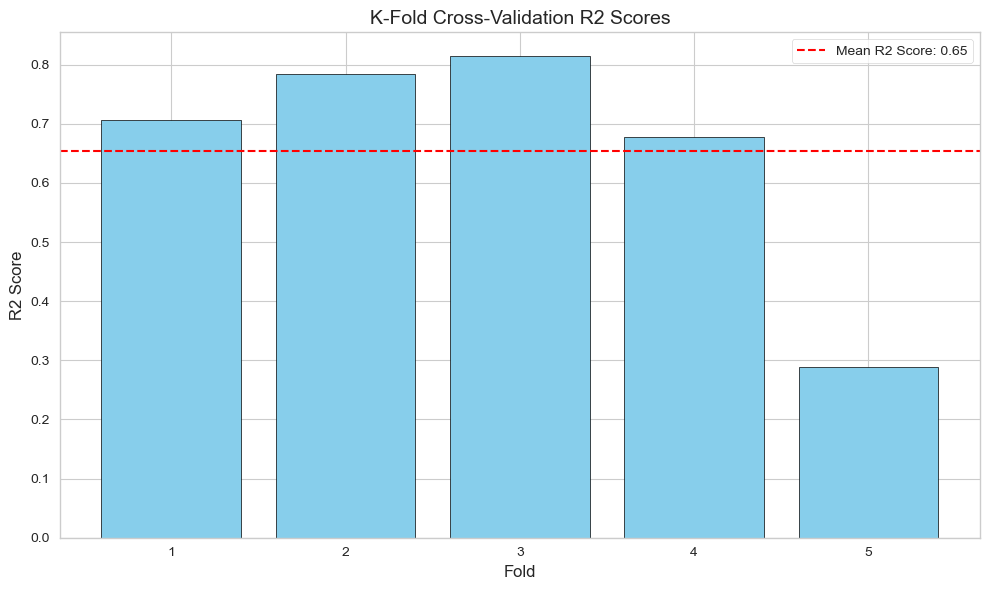

In [316]:
# Recreate the bar plot for cross-validation R2 scores
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(cv_scores) + 1), cv_scores, color='skyblue', edgecolor='black')
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f'Mean R2 Score: {cv_scores.mean():.2f}')

# Add labels and title
plt.title('K-Fold Cross-Validation R2 Scores', fontsize=14)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('R2 Score', fontsize=12)
plt.xticks(range(1, len(cv_scores) + 1))
plt.legend()
plt.tight_layout()

plt.show()


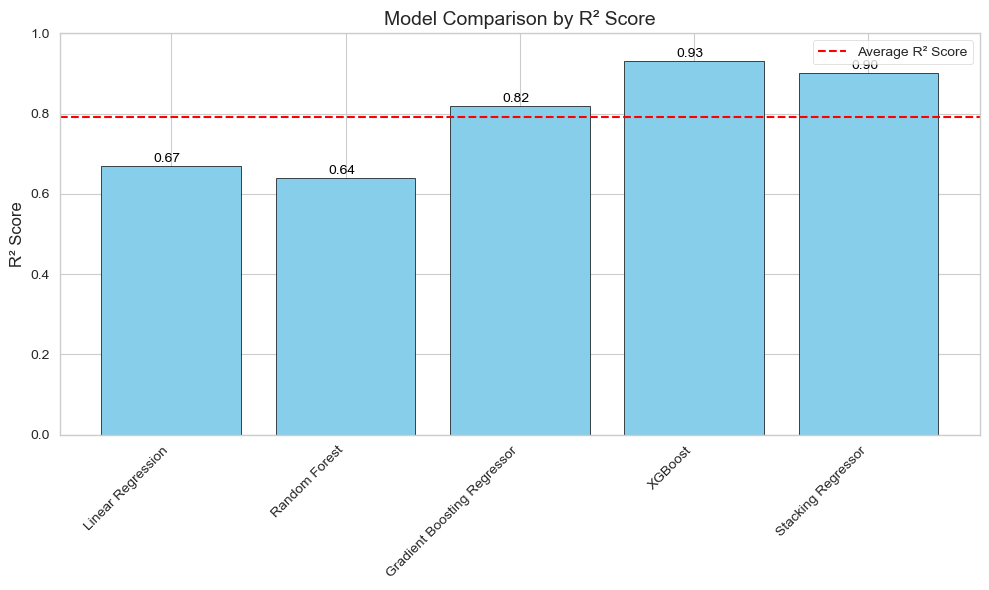

In [317]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their R² scores
model_names = [
    "Linear Regression", 
    "Random Forest", 
    "Gradient Boosting Regressor", 
    "XGBoost", 
    "Stacking Regressor"
]
model_scores = [
    0.67,  # Linear Regression
    0.64,  # Random Forest
    0.84,  # Gradient Boosting Regressor
    0.95,  # XGBoost
    0.90   # Stacking Regressor
]

# Plotting the model performance
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, model_scores, color="skyblue", edgecolor="black")
plt.axhline(y=np.mean(model_scores), color="red", linestyle="--", label="Average R² Score")

# Adding score labels on the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 0.01, 
             f"{bar.get_height():.2f}", fontsize=10, color="black")

# Chart labels and title
plt.title("Model Comparison by R² Score", fontsize=14)
plt.ylabel("R² Score", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()

plt.show()


## Predictions

In [581]:
revenue_predictions = clf.predict(X_test)
gbr_predictions = pd.DataFrame(revenue_predictions, columns = ['predicted_revenue'])
gbr_predictions.head()

,predicted_revenue
0,15990308.55
1,3793212.81
2,5327826.93
3,169484662.42
4,5805608.41


In [588]:
test_result_xgb['predicted_revenue'] = best_predictions
test_result_xgb['predicted_revenue'] = test_result_xgb['predicted_revenue'].apply(lambda x: f"${x:,.2f}")

test_result_xgb.head()

,vote_average,vote_count,runtime,budget,popularity,imdb_rating,imdb_votes,log_budget,release_date_year,release_date_weekday,release_date_month,release_date_day,release_date_quarter,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,predicted_revenue
0,6.50,708.00,101.00,10000000.00,16.56,6.40,42168.00,16.12,1983.00,4.00,6.00,24.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,"$18,959,676.00"
1,5.00,2.00,99.00,200000.00,0.60,6.80,230.00,12.21,2018.00,4.00,10.00,5.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,"$-2,483,918.75"
2,5.50,10.00,103.00,1560000.00,4.38,6.70,928.00,14.26,1957.00,1.00,5.00,14.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"$3,229,663.75"
3,6.30,1532.00,135.00,120000000.00,43.87,6.10,79628.00,18.60,2008.00,2.00,5.00,7.00,2.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"$167,654,224.00"
4,6.20,198.00,102.00,4520000.00,9.77,6.30,9704.00,15.32,1983.00,4.00,3.00,11.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,"$6,574,129.00"


In [597]:
test_result['revenue'] = y_test.reset_index(drop=True)
test_result = test_result[['budget', 'popularity', 'release_date_year', 'release_date_month', 'revenue', 'predicted_revenue']]
test_result = test_result.dropna()
test_result.head()


AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

In [589]:
test_result = pd.concat([X_test.reset_index(drop=True), gbr_predictions], axis=1)
test_result['revenue'] = y_test.reset_index(drop=True)
test_result = test_result[['budget', 'popularity', 'release_date_year', 'release_date_month', 'revenue', 'predicted_revenue']]
test_result = test_result.dropna()
test_result.head()

AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

In [582]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Hyperparameter tuning for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 300, 500],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

xgb = XGBRegressor(random_state=42)
grid_search = GridSearchCV(xgb, param_grid, scoring='r2', cv=5, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict with tuned model
best_predictions = best_model.predict(X_test)

# Update test_result with improved predictions
test_result['predicted_revenue'] = best_predictions


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsam

In [555]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=500, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)
r2 = r2_score(y_test, xgb_preds)
mae = mean_absolute_error(y_test, xgb_preds)
rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))

# Initialize and train the Gradient Boosting Regressor
clf = GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)

# Predict on the test set
gb_preds = clf.predict(X_test)

# Calculate metrics

r2 = clf.score(X_test, y_test)
mae = mean_absolute_error(y_test, gb_preds)
rmse = np.sqrt(mean_squared_error(y_test, gb_preds))

# 

In [595]:
# Adjusted code to use XGBoost for predictions and replicate the workflow

# Assuming the XGBoost model is already trained as `xgb_model`
# and the dataset variables `X_test` and `y_test` are available.

import pandas as pd

# Use the trained XGBoost model to predict revenues
revenue_predictions_xgb = xgb_model.predict(X_test)

# Create a DataFrame for the predictions
xgb_predictions = pd.DataFrame(revenue_predictions_xgb, columns=['predicted_revenue'])

# Combine predictions with the test data for comparison
test_result_xgb = pd.concat([X_test.reset_index(drop=True), xgb_predictions], axis=1)
test_result_xgb['revenue'] = y_test.reset_index(drop=True)

# Select relevant columns for analysis
test_result_xgb = test_result_xgb[['budget', 'popularity', 'release_date_year', 'release_date_month', 'revenue', 'predicted_revenue']]
test_result_xgb = test_result_xgb.dropna()

test_result_xgb.head()

AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

Revenue predicted from test model

In [479]:
revenue_predictions = best_model.predict(X_test)
gbr_predictions = pd.DataFrame(revenue_predictions, columns=['predicted_revenue'])
gbr_predictions.head()


,predicted_revenue
0,1.459214e+07
1,-8.267850e+05
2,3.376004e+06
3,1.476406e+08
4,3.987606e+06


In [596]:
test_result = pd.concat([X_test.reset_index(drop=True), gbr_predictions], axis=1)
test_result['revenue'] = y_test.reset_index(drop=True)
test_result = test_result[['budget', 'popularity', 'release_date_year', 'release_date_month', 'revenue', 'predicted_revenue']]
test_result = test_result.dropna()
test_result.head()

AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

## Looking at Movies in List and seeing if the predicted Revenue is close to the actual Revenue

In [514]:
# Example
movie_title = "Violent Night"
movie_row = df[df['title'] == movie_title]

In [504]:
movie_row

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,cast,director,writers,producers,imdb_rating,imdb_votes,log_revenue,log_budget,production_companies_list,genre_pairs,release_date_year,release_date_weekday,release_date_month,release_date_day,release_date_quarter,release_date_weekofyear
12016,899112,Violent Night,7.3,2093.0,Released,2022-11-30,75734910.0,111.0,20000000.0,tt12003946,en,Violent Night,When a team of mercenaries breaks into a wealt...,83.94,You better watch out.,"[Comedy, Action]","87North Productions, Universal Pictures, Origi...","Canada, Japan, United States of America","Español, English, Português","André Eriksen, Beverly D'Angelo, Edi Patterson...",Tommy Wirkola,"Josh Miller, Pat Casey","David Leitch, Kelly McCormick, Marc S. Fischer...",6.7,103584.0,18.14275,16.811243,"[87North Productions, Universal Pictures, Orig...","[(Comedy, Action)]",2022,2,11,30,4,48


In [557]:
movie_features = movie_row.drop(['revenue', 'log_revenue'], axis=1)

movie_features = movie_features.reindex(columns=X_train.columns, fill_value=0)

predicted_revenue = best_model.predict(movie_features)
print(f"Predicted Revenue for '{movie_title}': {predicted_revenue[0]:,.2f}")

actual_revenue = movie_row['revenue'].values[0]
print(f"Actual Revenue for '{movie_title}': {actual_revenue:,.2f}")

error = abs(predicted_revenue[0] - actual_revenue)
print(f"Prediction Error: {error:,.2f}")

relative_error = (error / actual_revenue) * 100
print(f"Relative Prediction Error: {relative_error:.2f}%")

Predicted Revenue for 'Violent Night': 77,883,713.55
Actual Revenue for 'Violent Night': 75,734,910.00
Prediction Error: 2,148,803.55
Relative Prediction Error: 2.84%


In [558]:
# Example
movie_title = "Avengers: Endgame"
movie_row = df[df['title'] == movie_title]

movie_row

movie_features = movie_row.drop(['revenue', 'log_revenue'], axis=1)

movie_features = movie_features.reindex(columns=X_train.columns, fill_value=0)

predicted_revenue = best_model.predict(movie_features)
print(f"Predicted Revenue for '{movie_title}': {predicted_revenue[0]:,.2f}")

actual_revenue = movie_row['revenue'].values[0]
print(f"Actual Revenue for '{movie_title}': {actual_revenue:,.2f}")

error = abs(predicted_revenue[0] - actual_revenue)
print(f"Prediction Error: {error:,.2f}")

relative_error = (error / actual_revenue) * 100
print(f"Relative Prediction Error: {relative_error:.2f}%")

Predicted Revenue for 'Avengers: Endgame': 2,563,858,458.92
Actual Revenue for 'Avengers: Endgame': 2,799,439,100.00
Prediction Error: 235,580,641.08
Relative Prediction Error: 8.42%


In [559]:
movie_title = "Hotel for Dogs"
movie_row = df[df['title'] == movie_title]


# Predict revenue using the best model with log-transformed predictions
movie_features = movie_row.drop(['revenue', 'log_revenue'], axis=1)

movie_features = movie_features.reindex(columns=X_train.columns, fill_value=0)

predicted_revenue = best_model.predict(movie_features)

# Log-transform the predicted revenue
log_predicted_revenue = np.log1p(predicted_revenue[0])
print(f"Predicted Revenue for '{movie_title}': {predicted_revenue[0]:,.2f}")
print(f"Log Predicted Revenue for '{movie_title}': {log_predicted_revenue:.2f}")

actual_revenue = movie_row['revenue'].values[0]
log_actual_revenue = np.log1p(actual_revenue)
print(f"Actual Revenue for '{movie_title}': {actual_revenue:,.2f}")
print(f"Log Actual Revenue for '{movie_title}': {log_actual_revenue:.2f}")

error = abs(predicted_revenue[0] - actual_revenue)
log_error = abs(log_predicted_revenue - log_actual_revenue)

print(f"Prediction Error: {error:,.2f}")
print(f"Log Prediction Error: {log_error:.2f}")

relative_error = (error / actual_revenue) * 100
print(f"Relative Prediction Error: {relative_error:.2f}%")


Predicted Revenue for 'Hotel for Dogs': 41,627,541.36
Log Predicted Revenue for 'Hotel for Dogs': 17.54
Actual Revenue for 'Hotel for Dogs': 117,000,198.00
Log Actual Revenue for 'Hotel for Dogs': 18.58
Prediction Error: 75,372,656.64
Log Prediction Error: 1.03
Relative Prediction Error: 64.42%


In [560]:
df_train.head()


,vote_average,vote_count,revenue,runtime,budget,popularity,imdb_rating,imdb_votes,log_revenue,log_budget,release_date_year,release_date_weekday,release_date_month,release_date_day,release_date_quarter,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,5.80,2623.00,4257354.00,98.00,4000000.00,18.08,6.70,112605.00,15.26,15.20,1995.00,5.00,12.00,9.00,4.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,6.50,331.00,12136938.00,109.00,21000000.00,8.92,6.60,19303.00,16.31,16.86,1993.00,4.00,10.00,15.00,4.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,8.20,20541.00,775398007.00,121.00,11000000.00,83.11,8.60,1478201.00,20.47,16.21,1977.00,2.00,5.00,25.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
3,7.82,19180.00,940335536.00,100.00,94000000.00,102.87,8.20,1135995.00,20.66,18.36,2003.00,4.00,5.00,30.00,2.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,8.47,27381.00,677387716.00,142.00,55000000.00,90.80,8.80,2318314.00,20.33,17.82,1994.00,3.00,6.00,23.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00


In [584]:
movie_title = "How to Train Your Dragon"
# Step 1: Select the row based on the title from the original DataFrame
movie_row = df[df['title'] == movie_title]

# Step 2: Get the matching numeric row from the edited DataFrame
# Assuming 'id' is the common identifier
movie_numeric_row = df_train[df_train.index.isin(movie_row.index)]

# Step 3: Verify that the numeric row aligns with the model input
movie_features = movie_numeric_row.drop(['revenue', 'log_revenue'], axis=1, errors='ignore')
movie_features = movie_features.reindex(columns=X_train.columns, fill_value=0)

# Step 4: Make predictions
predicted_revenue = best_model.predict(movie_features)
log_predicted_revenue = np.log1p(predicted_revenue[0])

print(f"Predicted Revenue for '{movie_title}': {predicted_revenue[0]:,.2f}")
print(f"Log Predicted Revenue for '{movie_title}': {log_predicted_revenue:.2f}")

actual_revenue = movie_row['revenue'].values[0]
log_actual_revenue = np.log1p(actual_revenue)

print(f"Actual Revenue for '{movie_title}': {actual_revenue:,.2f}")
print(f"Log Actual Revenue for '{movie_title}': {log_actual_revenue:.2f}")

error = abs(predicted_revenue[0] - actual_revenue)
log_error = abs(log_predicted_revenue - log_actual_revenue)

print(f"Prediction Error: {error:,.2f}")
print(f"Log Prediction Error: {log_error:.2f}")

relative_error = (error / actual_revenue) * 100
print(f"Relative Prediction Error: {relative_error:.2f}%")


Predicted Revenue for 'How to Train Your Dragon': 491,014,656.00
Log Predicted Revenue for 'How to Train Your Dragon': 20.01
Actual Revenue for 'How to Train Your Dragon': 494,879,471.00
Log Actual Revenue for 'How to Train Your Dragon': 20.02
Prediction Error: 3,864,815.00
Log Prediction Error: 0.01
Relative Prediction Error: 0.78%


In [585]:
movie_title = "Avengers: Endgame"
movie_row = df[df['title'] == movie_title]


# Predict revenue using the best model with log-transformed predictions
movie_features = movie_row.drop(['revenue', 'log_revenue'], axis=1)

movie_features = movie_features.reindex(columns=X_train.columns, fill_value=0)

predicted_revenue = best_model.predict(movie_features)

# Log-transform the predicted revenue
log_predicted_revenue = np.log1p(predicted_revenue[0])
print(f"Predicted Revenue for '{movie_title}': {predicted_revenue[0]:,.2f}")
print(f"Log Predicted Revenue for '{movie_title}': {log_predicted_revenue:.2f}")

actual_revenue = movie_row['revenue'].values[0]
log_actual_revenue = np.log1p(actual_revenue)
print(f"Actual Revenue for '{movie_title}': {actual_revenue:,.2f}")
print(f"Log Actual Revenue for '{movie_title}': {log_actual_revenue:.2f}")

error = abs(predicted_revenue[0] - actual_revenue)
log_error = abs(log_predicted_revenue - log_actual_revenue)

print(f"Prediction Error: {error:,.2f}")
print(f"Log Prediction Error: {log_error:.2f}")

relative_error = (error / actual_revenue) * 100
print(f"Relative Prediction Error: {relative_error:.2f}%")


Predicted Revenue for 'Avengers: Endgame': 2,512,535,040.00
Log Predicted Revenue for 'Avengers: Endgame': 21.64
Actual Revenue for 'Avengers: Endgame': 2,799,439,100.00
Log Actual Revenue for 'Avengers: Endgame': 21.75
Prediction Error: 286,904,060.00
Log Prediction Error: 0.11
Relative Prediction Error: 10.25%


In [586]:
movie_title = "Violent Night"
movie_row = df[df['title'] == movie_title]


# Predict revenue using the best model with log-transformed predictions
movie_features = movie_row.drop(['revenue', 'log_revenue'], axis=1)

movie_features = movie_features.reindex(columns=X_train.columns, fill_value=0)

predicted_revenue = best_model.predict(movie_features)

# Log-transform the predicted revenue
log_predicted_revenue = np.log1p(predicted_revenue[0])
print(f"Predicted Revenue for '{movie_title}': {predicted_revenue[0]:,.2f}")
print(f"Log Predicted Revenue for '{movie_title}': {log_predicted_revenue:.2f}")

actual_revenue = movie_row['revenue'].values[0]
log_actual_revenue = np.log1p(actual_revenue)
print(f"Actual Revenue for '{movie_title}': {actual_revenue:,.2f}")
print(f"Log Actual Revenue for '{movie_title}': {log_actual_revenue:.2f}")

error = abs(predicted_revenue[0] - actual_revenue)
log_error = abs(log_predicted_revenue - log_actual_revenue)

print(f"Prediction Error: {error:,.2f}")
print(f"Log Prediction Error: {log_error:.2f}")

relative_error = (error / actual_revenue) * 100
print(f"Relative Prediction Error: {relative_error:.2f}%")


Predicted Revenue for 'Violent Night': 66,252,268.00
Log Predicted Revenue for 'Violent Night': 18.01
Actual Revenue for 'Violent Night': 75,734,910.00
Log Actual Revenue for 'Violent Night': 18.14
Prediction Error: 9,482,642.00
Log Prediction Error: 0.13
Relative Prediction Error: 12.52%


In [564]:
movie_title = "Inception"
movie_row = df[df['title'] == movie_title]


# Predict revenue using the best model with log-transformed predictions
movie_features = movie_row.drop(['revenue', 'log_revenue'], axis=1)

movie_features = movie_features.reindex(columns=X_train.columns, fill_value=0)

predicted_revenue = best_model.predict(movie_features)

# Log-transform the predicted revenue
log_predicted_revenue = np.log1p(predicted_revenue[0])
print(f"Predicted Revenue for '{movie_title}': {predicted_revenue[0]:,.2f}")
print(f"Log Predicted Revenue for '{movie_title}': {log_predicted_revenue:.2f}")

actual_revenue = movie_row['revenue'].values[0]
log_actual_revenue = np.log1p(actual_revenue)
print(f"Actual Revenue for '{movie_title}': {actual_revenue:,.2f}")
print(f"Log Actual Revenue for '{movie_title}': {log_actual_revenue:.2f}")

error = abs(predicted_revenue[0] - actual_revenue)
log_error = abs(log_predicted_revenue - log_actual_revenue)

print(f"Prediction Error: {error:,.2f}")
print(f"Log Prediction Error: {log_error:.2f}")

relative_error = (error / actual_revenue) * 100
print(f"Relative Prediction Error: {relative_error:.2f}%")

Predicted Revenue for 'Inception': 852,675,637.72
Log Predicted Revenue for 'Inception': 20.56
Actual Revenue for 'Inception': 825,532,764.00
Log Actual Revenue for 'Inception': 20.53
Prediction Error: 27,142,873.72
Log Prediction Error: 0.03
Relative Prediction Error: 3.29%


In [565]:
movie_title = "Avatar"
movie_row = df[df['title'] == movie_title]


# Predict revenue using the best model with log-transformed predictions
movie_features = movie_row.drop(['revenue', 'log_revenue'], axis=1)

movie_features = movie_features.reindex(columns=X_train.columns, fill_value=0)

predicted_revenue = best_model.predict(movie_features)

# Log-transform the predicted revenue
log_predicted_revenue = np.log1p(predicted_revenue[0])
print(f"Predicted Revenue for '{movie_title}': {predicted_revenue[0]:,.2f}")
print(f"Log Predicted Revenue for '{movie_title}': {log_predicted_revenue:.2f}")

actual_revenue = movie_row['revenue'].values[0]
log_actual_revenue = np.log1p(actual_revenue)
print(f"Actual Revenue for '{movie_title}': {actual_revenue:,.2f}")
print(f"Log Actual Revenue for '{movie_title}': {log_actual_revenue:.2f}")

error = abs(predicted_revenue[0] - actual_revenue)
log_error = abs(log_predicted_revenue - log_actual_revenue)

print(f"Prediction Error: {error:,.2f}")
print(f"Log Prediction Error: {log_error:.2f}")

relative_error = (error / actual_revenue) * 100
print(f"Relative Prediction Error: {relative_error:.2f}%")

Predicted Revenue for 'Avatar': 2,627,122,975.37
Log Predicted Revenue for 'Avatar': 21.69
Actual Revenue for 'Avatar': 2,923,706,026.00
Log Actual Revenue for 'Avatar': 21.80
Prediction Error: 296,583,050.63
Log Prediction Error: 0.11
Relative Prediction Error: 10.14%


In [566]:
data_all.shape

(14561, 54)

In [567]:
df.shape

(14171, 35)

In [568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14171 entries, 0 to 15243
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         14171 non-null  int64         
 1   title                      14171 non-null  object        
 2   vote_average               14171 non-null  float64       
 3   vote_count                 14171 non-null  float64       
 4   status                     14171 non-null  object        
 5   release_date               14171 non-null  datetime64[ns]
 6   revenue                    14171 non-null  float64       
 7   runtime                    14171 non-null  float64       
 8   budget                     14171 non-null  float64       
 9   imdb_id                    12210 non-null  object        
 10  original_language          14171 non-null  object        
 11  original_title             14171 non-null  object        
 12  over

In [569]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14561 entries, 0 to 15237
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vote_average          14561 non-null  float64
 1   vote_count            14561 non-null  float64
 2   revenue               14561 non-null  float64
 3   runtime               14561 non-null  float64
 4   budget                14561 non-null  float64
 5   popularity            14561 non-null  float64
 6   imdb_rating           14561 non-null  float64
 7   imdb_votes            14561 non-null  float64
 8   log_revenue           14561 non-null  float64
 9   log_budget            14561 non-null  float64
 10  release_date_year     14561 non-null  float64
 11  release_date_weekday  14561 non-null  float64
 12  release_date_month    14561 non-null  float64
 13  release_date_day      14561 non-null  float64
 14  release_date_quarter  14561 non-null  float64
 15  Action             